# Machine Learning - Regression - Medical Cost

Database Kaggle https://www.kaggle.com/datasets/mirichoi0218/insurance

The database contains attributes about patients and the respective value of their medical expenses. We will use this collected data to predict insurance value using Regression.

In [1]:
# Pandas for database manipulation and numpy (math library)
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Dataframe path in google drive
df = pd.read_csv('/content/gdrive/MyDrive/insurance.csv',sep=',',encoding='iso-8859-1')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Columns

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance

In [6]:
df.shape

(1338, 7)

## Data exploration and processing

In [7]:
# checking for the existence of null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [9]:
# Function that shows statistical measures from each column (mean, maximum value, minimum value, value of the quartiles and standard deviation )
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df2 = pd.DataFrame.copy(df)

In this database, there are only three columns with nominal values, so we must  change it to discrete variables.

In [ ]:
df2['sex'].replace({'female':0,'male':1}, inplace=True)
df2['smoker'].replace({'yes':0,'no':1}, inplace=True)
df2['region'].replace({'southwest':0, 'southeast':1,'northwest':2,'northeast':3,}, inplace = True)

In [12]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [13]:
# Pandas funcition to show the data type of the elements within a Series or a column of a DataFrame.
df2.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


In [14]:
# Pandas function to show number of line and columns of Dataframe.
df2.shape

(1338, 7)

## Analysis of outliers

In [24]:
# Using Plotly graphics resources to analyse each variable (column), so the boxplot will show the quartiles distribuition of values
import plotly.express as px

In [25]:
# No outliers
boxplot = px.box(df2,y='age')
boxplot

In [26]:
# Categorical values, 0 or 1
boxplot = px.box(df2,y='sex')
boxplot

In [27]:
# Some outlier values that do not necessarily represent an error. I must check it out
boxplot = px.box(df2,y='bmi')
boxplot

In [28]:
# No outliers
boxplot = px.box(df2,y='children')
boxplot

In [29]:
# Categorical values
boxplot = px.box(df2,y='smoker')
boxplot

In [30]:
#No outliers
boxplot = px.box(df2,y='region')
boxplot

In [32]:
#Some outliers may demonstrate really expensive medical sources.
oxplot = px.box(df2,y='charges')
boxplot

## Linear Correlation

In [34]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [ ]:
#Target variable (y): charges

In [ ]:
#Independent variable (xi): age, sex, bmi, children, smoker, region

In [33]:
# Using now Matplotlib for graphic resoures (statistical measures)
import matplotlib.pyplot as plt

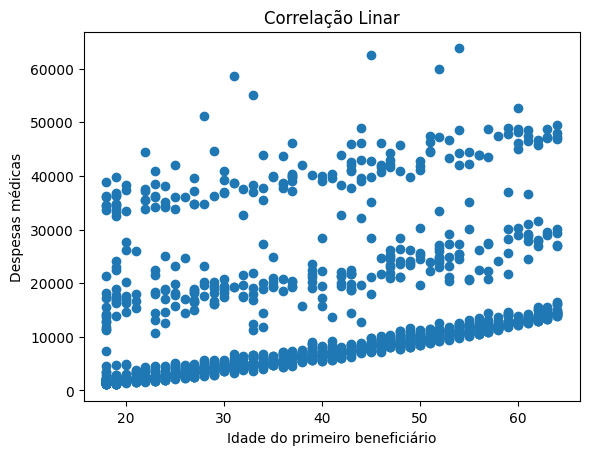

In [35]:
# CREATING THE SCATTER PLOT
plt.scatter(df.age, df.charges)
plt.title('Correlação Linar')
plt.xlabel('Idade do primeiro beneficiário')
plt.ylabel('Despesas médicas')
plt.grid(False)

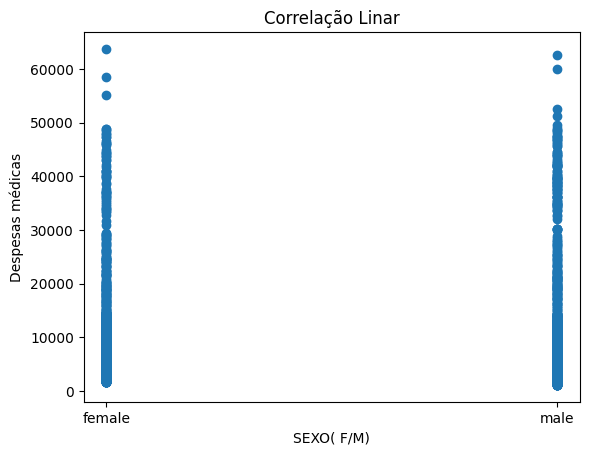

In [36]:
plt.scatter(df.sex, df.charges)
plt.title('Correlação Linar')
plt.xlabel('SEXO( F/M)')
plt.ylabel('Despesas médicas')
plt.grid(False)

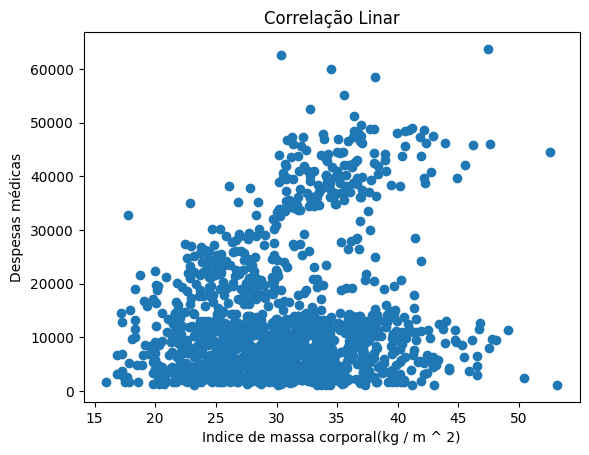

In [37]:
plt.scatter(df.bmi, df.charges)
plt.title('Correlação Linar')
plt.xlabel('Indice de massa corporal(kg / m ^ 2)')
plt.ylabel('Despesas médicas')
plt.grid(False)

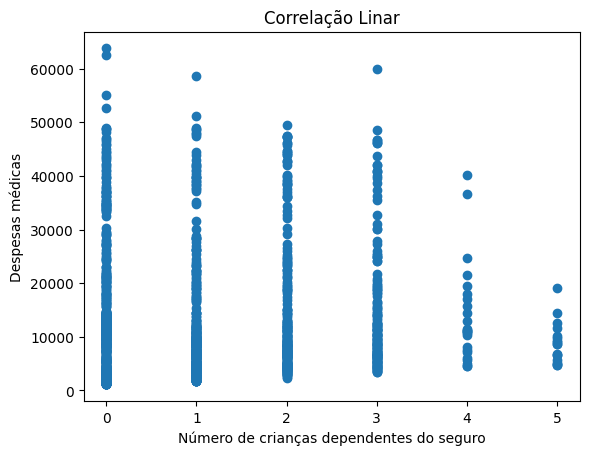

In [38]:
plt.scatter(df.children, df.charges)
plt.title('Correlação Linar')
plt.xlabel('Número de crianças dependentes do seguro')
plt.ylabel('Despesas médicas')
plt.grid(False)

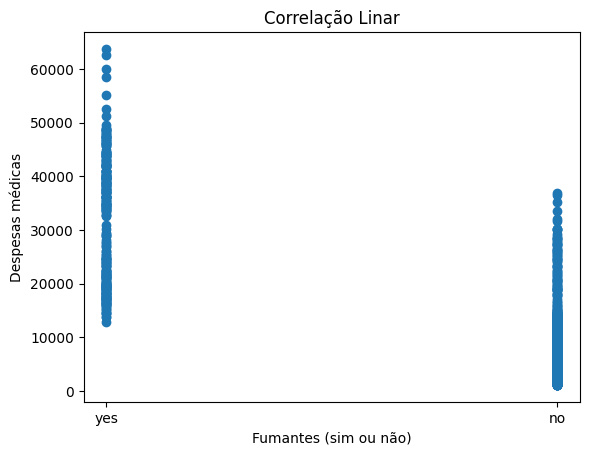

In [39]:
plt.scatter(df.smoker, df.charges)
plt.title('Correlação Linar')
plt.xlabel('Fumantes (sim ou não)')
plt.ylabel('Despesas médicas')
plt.grid(False)

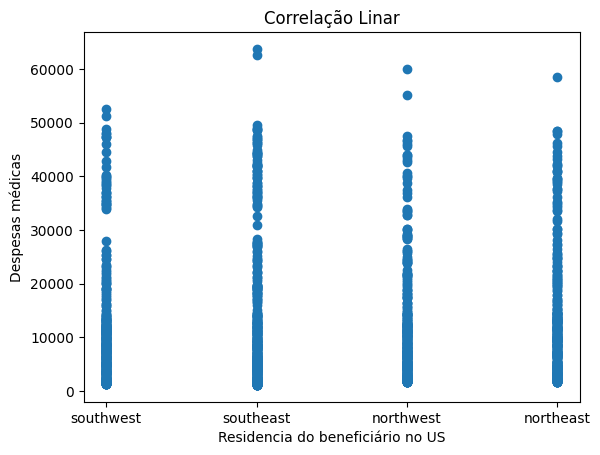

In [40]:
plt.scatter(df.region, df.charges)
plt.title('Correlação Linar')
plt.xlabel('Residencia do beneficiário no US')
plt.ylabel('Despesas médicas')
plt.grid(False)

In [41]:
import seaborn as sns

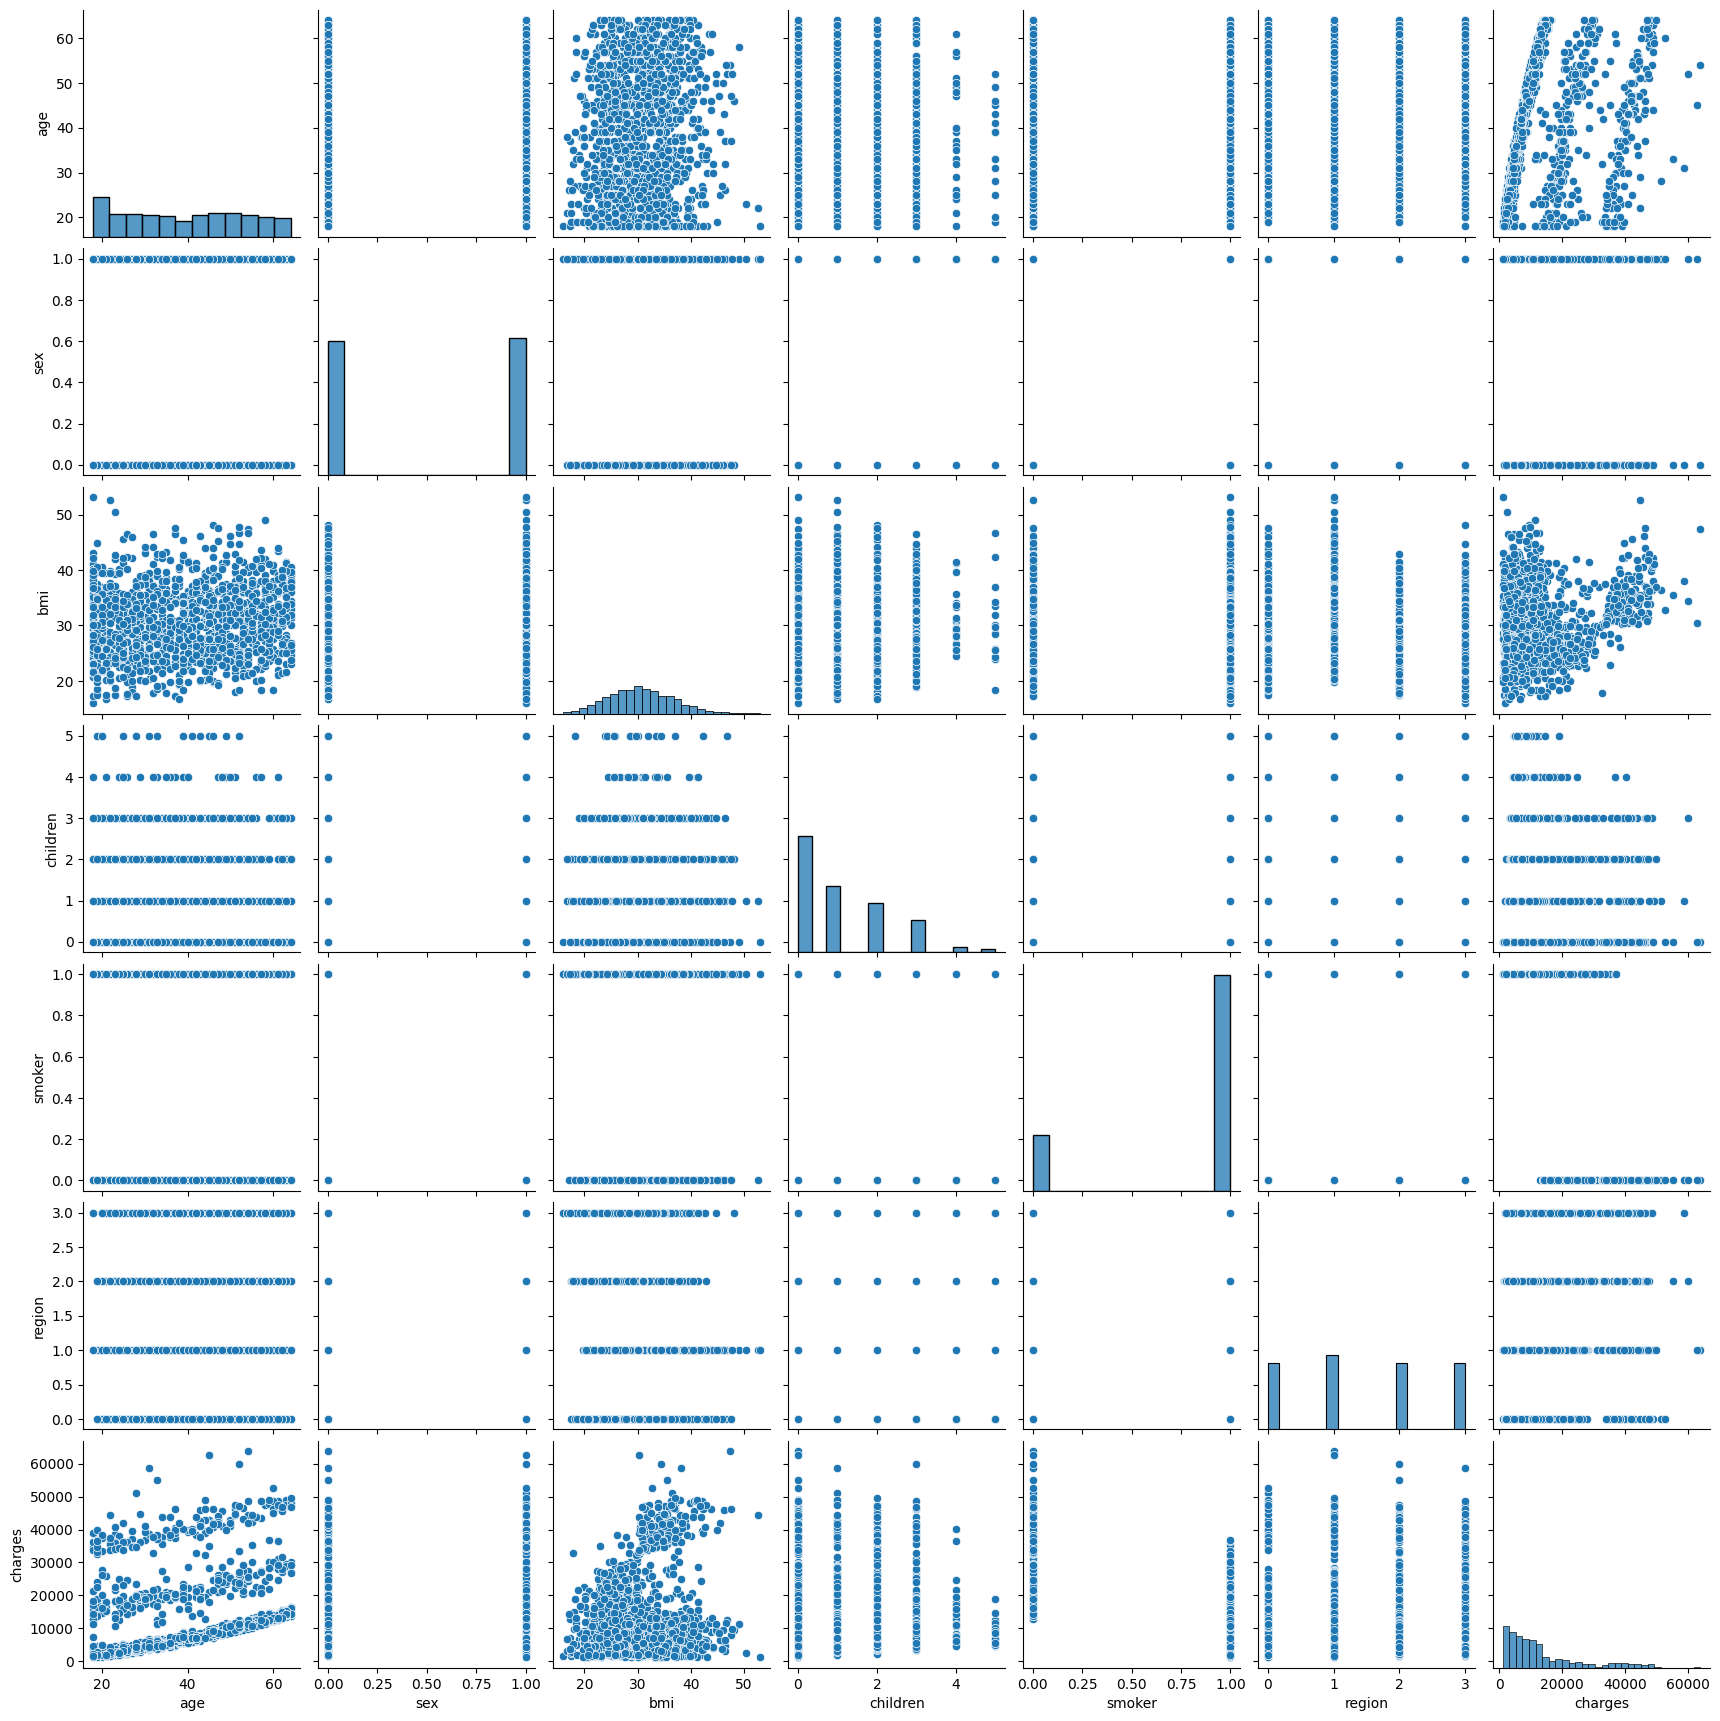

In [42]:
# Using seaborn to see all de linear correlation
sns.pairplot(df2);

**A strong linear relationship would be indicated by a scatter plot graph with a shape close to a straight line. A slope close to 45 degrees would indicate a strong positive correlation. Alternatively, a slope above 90 degrees would indicate a negative correlation. However, it is observed that the dispersion of the points indicates that there is not enough linear correlation to use linear regression methods; however, we will still analyze other statistical tests to infer more securely and also use the Linear Regression algorithm to observe the accuracy values.**

## Q Q - plot Graphs

In [44]:
# Graphic library used to show normall distribuiton
import scipy.stats as stats

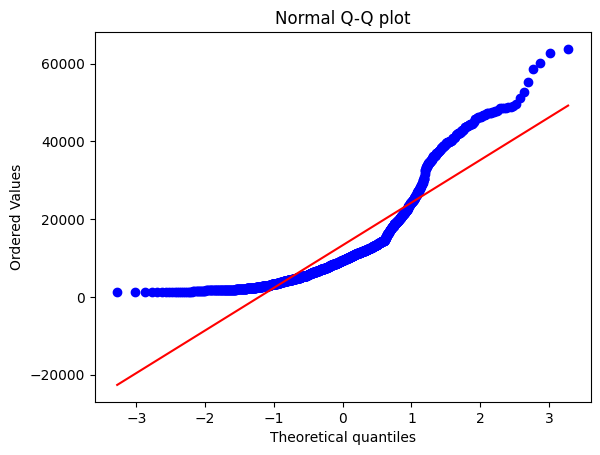

In [45]:
# Let's check if the variables are normally distributed.
stats.probplot(df2['charges'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()



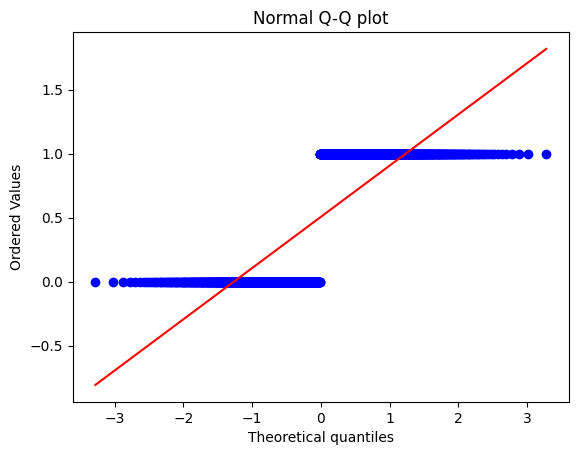

In [46]:
stats.probplot(df2['sex'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()


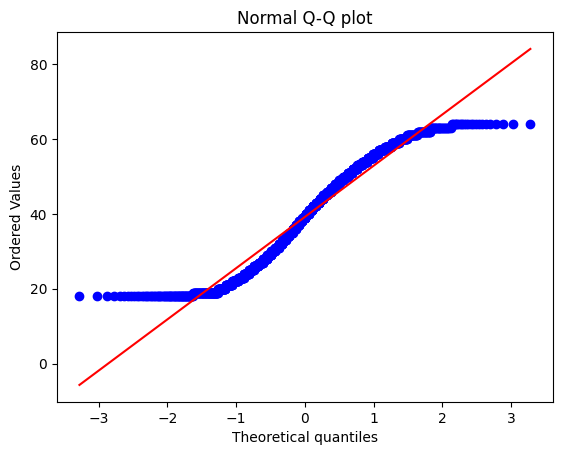

In [48]:
stats.probplot(df2['age'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()



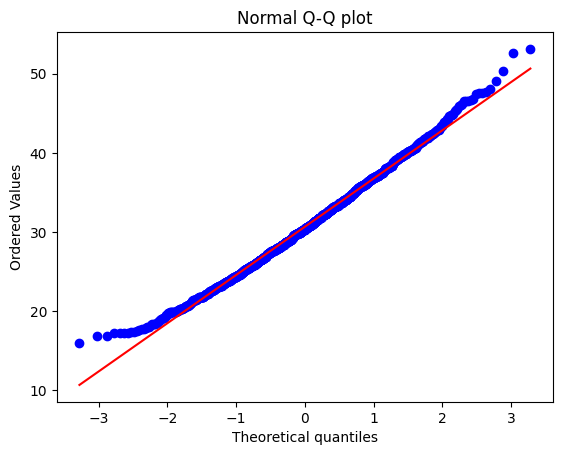

In [49]:
stats.probplot(df2['bmi'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

# It has a normal tendency but has dispersion at the extremes.

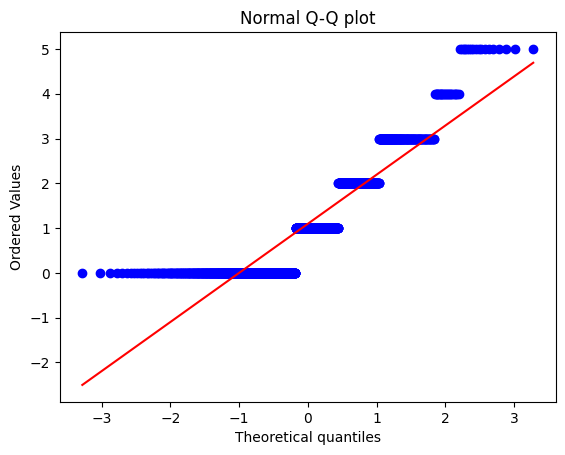

In [51]:
stats.probplot(df2['children'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()


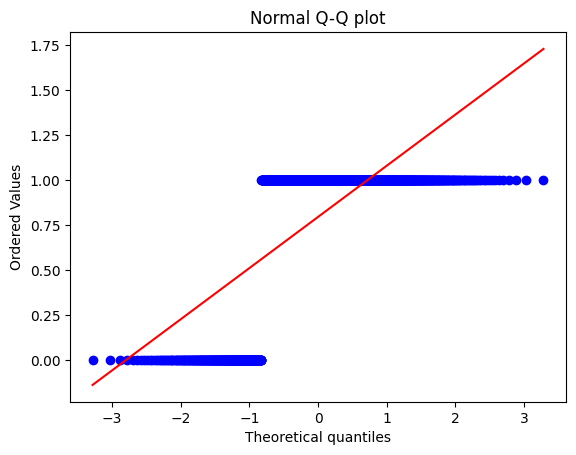

In [53]:
stats.probplot(df2['smoker'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()


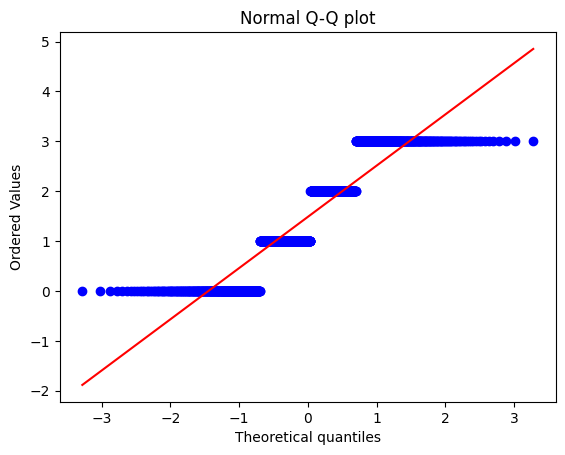

In [54]:
stats.probplot(df2['region'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()


As we can see above, none of the distributions completely approaches the normal distribution. Only one variable came close, but it has dispersion at the extremes.

## Analysis through Histograms

In [55]:
import plotly.express as px

In [57]:
hist= px.histogram(df2, x='charges',nbins=60)
hist.update_layout(width = 800, height=500, title_text='Despesas médicas')
hist.show()

# The histogram shows a tail tending to the right, which also confirms that there is no normal distribution.
# Since the target does not have a normal distribution, we can disregard PEARSON.

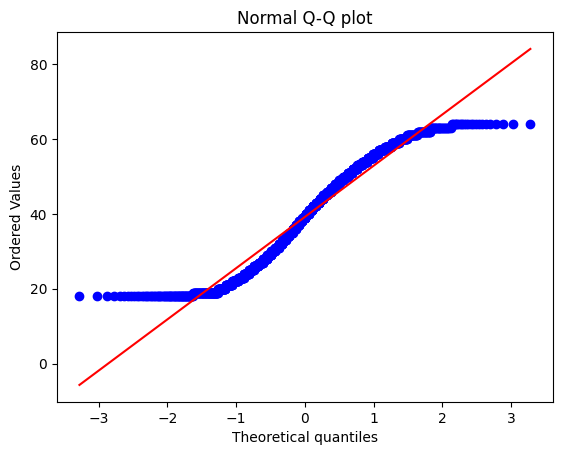

In [58]:
stats.probplot(df2['age'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [60]:
hist = px.histogram(df2, x ='age', nbins=60)
hist.update_layout(width=800, height = 500, title_text='SEXO')
hist.show()

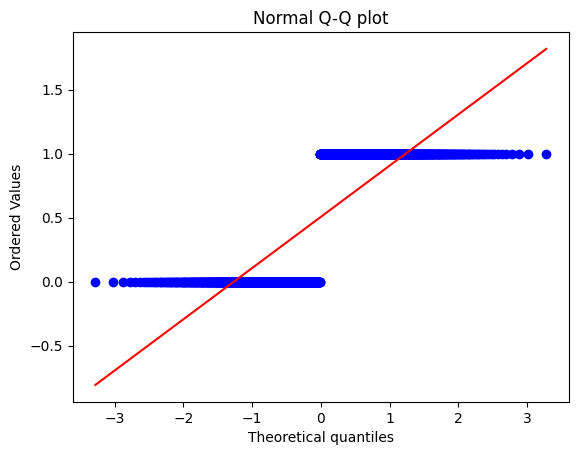

In [61]:
stats.probplot(df2['sex'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [62]:
hist = px.histogram(df2, x ='sex', nbins=60)
hist.update_layout(width=800, height = 500, title_text='Quantidade de comodos')
hist.show()

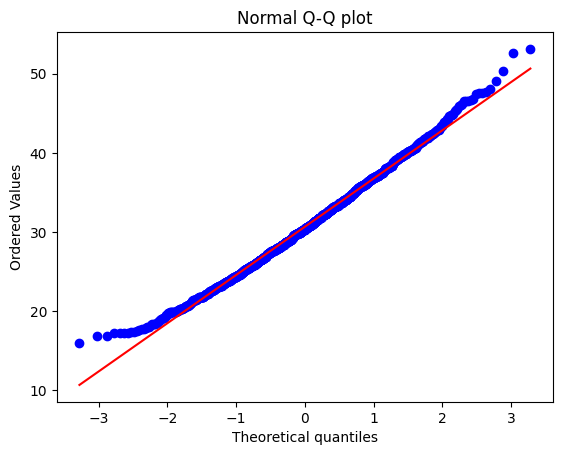

In [63]:
stats.probplot(df2['bmi'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [64]:
hist = px.histogram(df2, x ='bmi', nbins=60)
hist.update_layout(width=800, height = 500, title_text='Indice de massa corporal')
hist.show()

# The closest to the normal distribution, as expected

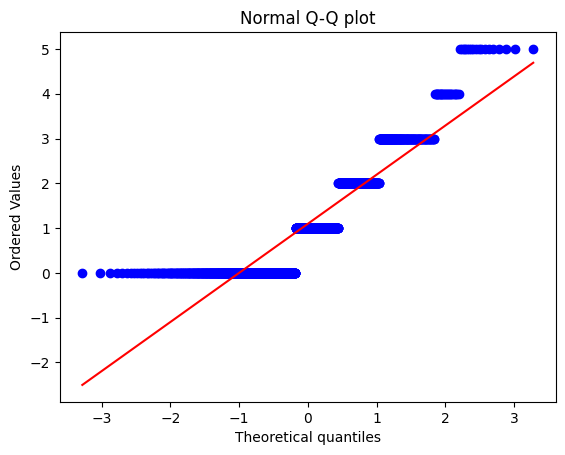

In [65]:
stats.probplot(df2['children'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [66]:
hist = px.histogram(df2, x ='children', nbins=60)
hist.update_layout(width=800, height = 500, title_text='Numero de crianças dependentes do plano')
hist.show()

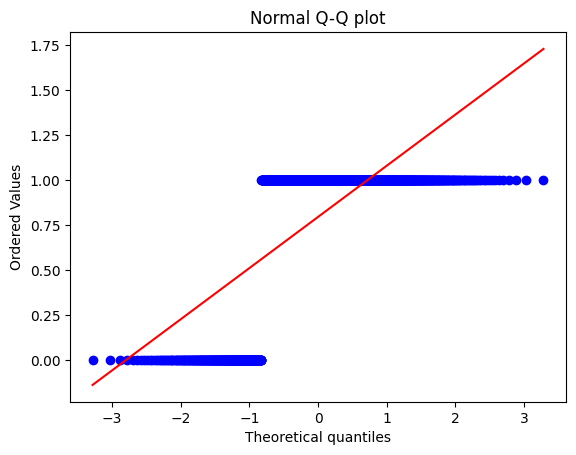

In [67]:
stats.probplot(df2['smoker'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [68]:
hist = px.histogram(df2, x ='smoker', nbins=60)
hist.update_layout(width=800, height = 500, title_text='Fumante ou não')
hist.show()

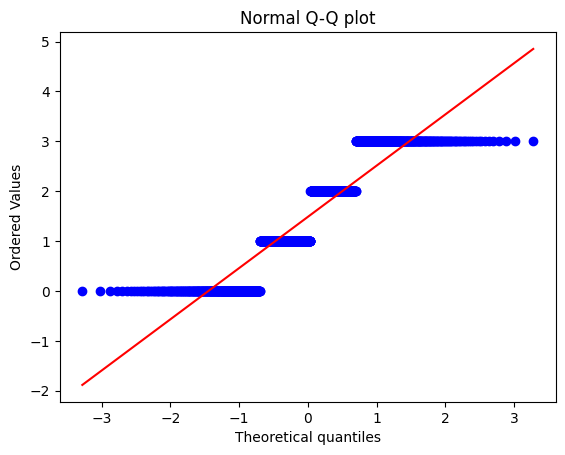

In [69]:
stats.probplot(df2['region'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [70]:
hist = px.histogram(df2, x ='region', nbins=60)
hist.update_layout(width=800, height = 500, title_text='Regiao residencial nos EUA')
hist.show()

As already analyzed by the scatter plot and the QQ plot, the results of the distribution in the histogram confirmed that only one of the variables approaches a normal distribution.

## SHAPIRO WILK TEST

**SHAPIRO- WILK TEST**

H0 (null hypothesis) : Normal Distribution : p>0.05

Ha (alternative hypothesis) : Non-Normal Distribution : p<=0.05

Limit = only serves up to 5000 records (lines)

In [71]:
stats.shapiro(df2.charges)
# confirms non-normal distribution for the target variable

ShapiroResult(statistic=np.float64(0.8146881157362383), pvalue=np.float64(1.1505226334932036e-36))

In [72]:
estatistica, p = stats.shapiro(df2.charges)
print(f'Estatistica do teste: {estatistica}')
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do teste: 0.8146881157362383
p-valor: 1.1505226334932036e-36


In [73]:
estatistica, p = stats.shapiro(df2.sex)
print(f'Estatistica do teste: {estatistica}')
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do teste: 0.6365630750539505
p-valor: 1.4423508345140056e-46


In [74]:
estatistica, p = stats.shapiro(df2.age)
print(f'Estatistica do teste: {estatistica}')
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do teste: 0.9447009637825445
p-valor: 5.69204692845418e-22


In [75]:
estatistica, p = stats.shapiro(df2.bmi)
print(f'Estatistica do teste: {estatistica}')
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do teste: 0.9938864621676107
p-valor: 2.60468368798344e-05


In [76]:
estatistica, p = stats.shapiro(df2.children)
print(f'Estatistica do teste: {estatistica}')
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do teste: 0.823180467362945
p-valor: 5.066436570900864e-36


In [77]:
estatistica, p = stats.shapiro(df2.smoker)
print(f'Estatistica do teste: {estatistica}')
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do teste: 0.49503324254083014
p-valor: 7.535159039204203e-52


In [79]:
estatistica, p = stats.shapiro(df2.region)
print(f'Estatistica do teste: {estatistica}')
print(f'p-valor: {p}')
# confirms non-normal distributionl

Estatistica do teste: 0.8594500079820196
p-valor: 5.879467644966618e-33


As expected, none of the variables have a normal distribution.

## LILLIEFORS TEST (kolmogorov_ Sminorv)


H0 (null hypothesis) : Normal Distribution : p>0.05

Ha (alternative hypothesis) :Non-Normal Distribution : p<=0.05

In [78]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [80]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df2.charges, dist = 'norm')
print('Estatistica do Teste: {}'.format(estatistica))
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do Teste: 0.18846450965981876
p-valor: 0.0009999999999998899


In [81]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df2.sex, dist = 'norm')
print('Estatistica do Teste: {}'.format(estatistica))
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do Teste: 0.34395415731732243
p-valor: 0.0009999999999998899


In [82]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df2.age, dist = 'norm')
print('Estatistica do Teste: {}'.format(estatistica))
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do Teste: 0.07894454646849702
p-valor: 0.0009999999999998899


In [84]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df2.bmi, dist = 'norm')
print('Estatistica do Teste: {}'.format(estatistica))
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do Teste: 0.026099881197044872
p-valor: 0.04431273291697496


In [85]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df2.children, dist = 'norm')
print('Estatistica do Teste: {}'.format(estatistica))
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do Teste: 0.2471317838278972
p-valor: 0.0009999999999998899


In [86]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df2.smoker, dist = 'norm')
print('Estatistica do Teste: {}'.format(estatistica))
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do Teste: 0.48923525156696346
p-valor: 0.0009999999999998899


In [87]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df2.region, dist = 'norm')
print('Estatistica do Teste: {}'.format(estatistica))
print(f'p-valor: {p}')
# confirms non-normal distribution

Estatistica do Teste: 0.18437438048019716
p-valor: 0.0009999999999998899


**LILLIFORS TEST AND OTHER RECORDS: WE CONFIRM THAT THE DISTRIBUTION IS NOT NORMAL**

## Linear Correlation

**TESTS:**
- Pearson (normal distribution)
- Spearman (non-normal distribution)
- Kendall (non-normal distribution with a small number of samples)

In [ ]:
# Is this case, we are going to use Spearman Test

In [ ]:
# Our hypotheses:
# Ho = there is no linear correlation: p>0.05
# Ha = there is a linear correlation: p<=0.05

In [89]:
# Spearman:
coef, p  = stats.spearmanr(df2.charges, df.bmi)
print(f'Coeficiente de correlação: {coef}')
print(f'p-valor: {p}')

# there is a linear correlation

Coeficiente de correlação: 0.11939590358331147
p-valor: 1.1926059544526826e-05


In [91]:
# Correlation beteween all the variables
correlacoes = df2.corr(method = 'spearman')
correlacoes

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020809,0.107736,0.056992,0.025210,-0.004315,0.534392
sex,-0.020809,1.000000,0.044802,0.015589,-0.076185,-0.004614,0.009490
bmi,0.107736,0.044802,1.000000,0.015607,-0.002203,-0.152959,0.119396
children,0.056992,0.015589,0.015607,1.000000,-0.016583,-0.010604,0.133339
smoker,0.025210,-0.076185,-0.002203,-0.016583,1.000000,-0.002155,-0.663460
region,-0.004315,-0.004614,-0.152959,-0.010604,-0.002155,1.000000,0.043531
charges,0.534392,0.009490,0.119396,0.133339,-0.663460,0.043531,1.000000


<Axes: >

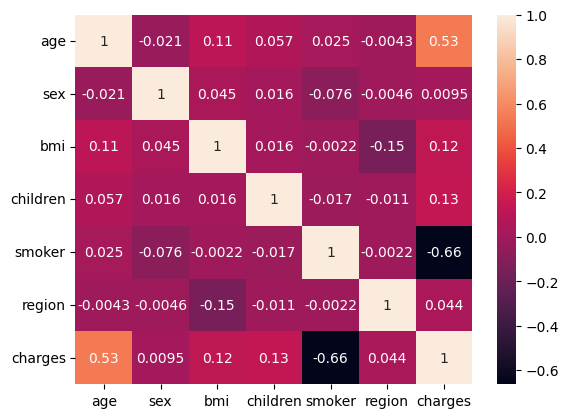

In [92]:
# Heatmap with the linear correlation values
plt.figure()
sns.heatmap(correlacoes, annot=True)

## SIMPLE LINEAR REGRESSION

### Average value by age




Linear Function : y = ax+ b

First we are going to use Age as x variable to calculate L.R

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [ ]:
x1 = df2.iloc[:,0:1].values
x1

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [ ]:
# Y target is Charges column
y = df2.iloc[:,6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
# Using SkLearn
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size=0.3, random_state=10)

In [ ]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [ ]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Instantiating the linear regression and passing the parameters
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
# Intercept (linear coefficient)
reg_linear1.intercept_

2428.663437987356

In [ ]:
# Slope coefficient
reg_linear1.coef_

array([281.01394743])


Linear equation to make predictions: expenses = 2428.66 + 281.01*age

In [ ]:
# Calculating the score (accuracy of the predictions)
reg_linear1.score(x_treino, y_treino)

# as we predict, not a good result

0.10386818385382768

In [ ]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([ 8329.95633412, 10297.05396616, 18446.45844177,  8329.95633412,
       12545.16554564, 13107.19344051, 13388.20738794, 20132.54212637,
        8329.95633412, 12826.17949307, 20413.55607381, 17884.4305469 ,
       17041.38870459,  8610.97028155, 13107.19344051, 14512.26317768,
       13669.22133538,  8610.97028155,  7767.92843925, 10016.04001872,
       13388.20738794, 17603.41659946, 18727.4723892 , 20132.54212637,
       20413.55607381, 13669.22133538, 17041.38870459,  7486.91449181,
       12264.1515982 , 14793.27712511,  8329.95633412, 14231.24923025,
       15917.33291485, 12826.17949307, 19851.52817894, 18727.4723892 ,
        7767.92843925, 17322.40265203,  7767.92843925, 11140.09580846,
       12826.17949307,  9735.02607129, 18165.44449433, 17884.4305469 ,
        8048.94238668, 10016.04001872, 16198.34686229, 10859.08186103,
       19851.52817894, 19289.50028407, 13107.19344051,  7767.92843925,
        8610.97028155, 12264.1515982 , 20413.55607381, 14231.24923025,
      

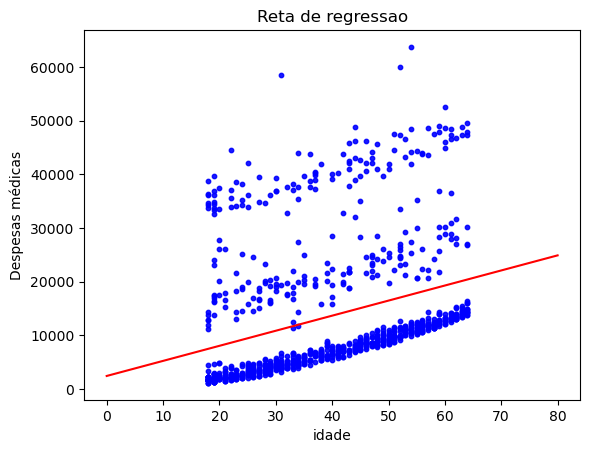

In [ ]:
# Regression line and scatter plot
plt.scatter(y=y_treino, x=x_treino, color = 'blue', s=10, alpha=0.9)
x_plot = np.linspace(0, 80)
plt.plot(x_plot, x_plot*reg_linear1.coef_ + reg_linear1.intercept_, color = 'red')
plt.title('Reta de regressao')
plt.ylabel('Despesas médicas')
plt.xlabel('idade')
plt.show()

In [ ]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([12826.17949307, 12545.16554564, 19008.48633664, 19570.51423151,
       10578.06791359, 13950.23528281, 15074.29107255,  8048.94238668,
       14793.27712511, 14512.26317768,  8329.95633412,  9735.02607129,
       14512.26317768, 13950.23528281, 15917.33291485, 19289.50028407,
        9454.01212386, 20132.54212637, 18165.44449433, 12545.16554564,
       14793.27712511,  7767.92843925,  7486.91449181, 13107.19344051,
       10297.05396616, 19008.48633664, 14793.27712511, 17603.41659946,
        9735.02607129, 13388.20738794,  7767.92843925, 13388.20738794,
       15074.29107255, 14793.27712511, 10578.06791359, 12264.1515982 ,
       19851.52817894, 17041.38870459, 16479.36080972, 14793.27712511,
       20132.54212637, 16479.36080972, 12545.16554564, 14793.27712511,
        7486.91449181, 14231.24923025, 15636.31896742, 13950.23528281,
       19008.48633664, 18165.44449433,  8891.98422899, 10297.05396616,
       15074.29107255, 18727.4723892 , 17322.40265203, 19570.51423151,
      

In [ ]:
y_teste

array([ 7281.5056  ,  5267.81815 , 12347.172   , 24513.09126 ,
        3736.4647  ,  7358.17565 ,  9788.8659  , 17085.2676  ,
        8211.1002  , 19798.05455 ,  3077.0955  ,  3385.39915 ,
        6837.3687  ,  8538.28845 , 26392.26029 , 13012.20865 ,
        3227.1211  , 15170.069   , 11073.176   , 20773.62775 ,
       39556.4945  ,  2134.9015  ,  2198.18985 ,  6555.07035 ,
        4340.4409  , 12622.1795  ,  7740.337   , 12475.3513  ,
        3987.926   , 21082.16    ,  1241.565   , 40103.89    ,
       17929.30337 ,  8302.53565 ,  3471.4096  ,  5846.9176  ,
       13352.0998  ,  9144.565   , 25656.57526 ,  7726.854   ,
       13887.9685  , 30284.64294 ,  5266.3656  , 12797.20962 ,
        1146.7966  ,  7046.7222  ,  8627.5411  , 39597.4072  ,
       12323.936   , 11454.0215  , 40904.1995  ,  3171.6149  ,
        7445.918   , 13607.36875 , 27346.04207 , 12557.6053  ,
       10797.3362  ,  5488.262   ,  6282.235   , 40941.2854  ,
        1708.0014  , 23306.547   , 28950.4692  ,  1664.

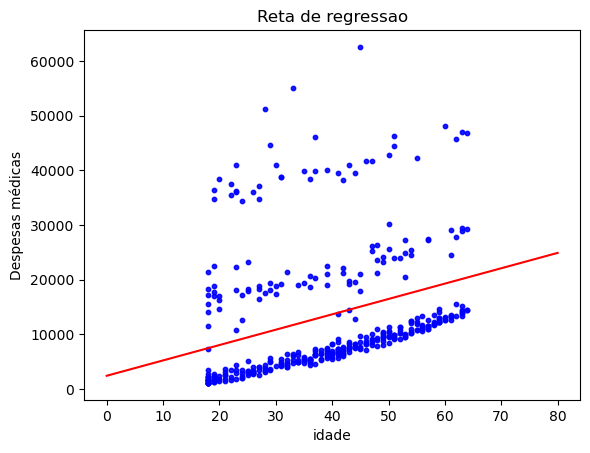

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color = 'blue', s=10, alpha=0.9)
x_plot = np.linspace(0, 80)
plt.plot(x_plot, x_plot*reg_linear1.coef_ + reg_linear1.intercept_, color = 'red')
plt.title('Reta de regressao')
plt.ylabel('Despesas médicas')
plt.xlabel('idade')
plt.show()

In [ ]:
# Making predictions for different values
valor_despesas = reg_linear1.predict([[55]])
valor_despesas

array([17884.4305469])

## Metrics

In [ ]:
# Absolute Error
abs(y_teste - previsoes_teste).mean()

8829.869512552257

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_teste, previsoes_teste)

8829.869512552257

In [ ]:
# Mean Squared error
mean_squared_error(y_teste,previsoes_teste)

124102543.68297596

In [ ]:
# Root of the mean squared error
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

11140.13212143267

## Medical expenses due to the smoker column

In [ ]:
# I will go straight to this because it presented a better result.
# I also tested here in relation to children: 0.03 R^2
# smoker: R^2 improved 61%, linear coefficient 32579.47; angular coefficient -24100.71, absolute error 5361.45, RMSE: 7026.60, CROSS-VALIDATION: 60.33%
# region:0.001% R^2
# BEST: smoker, equation: value = 32579.47 - 24100.71*smoker

In [ ]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.9240
1,18,1,33.77,1,1,1,1725.5523


In [ ]:
x2 = df2.iloc[:,4:5].values
x2

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [ ]:
y = df2.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Creating test and train variables, libraries already downloaded
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size=0.3, random_state=10)

In [ ]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [ ]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
# Intercept (Linear Coefficient)
reg_linear2.intercept_

32579.47995559586

In [ ]:
# Slope Coefficient
reg_linear2.coef_

array([-24100.71108188])

In [ ]:
# Calculating the score (accuracy of the predictions)
reg_linear2.score(x_treino, y_treino)


# BEST RESULT AFTER TESTING ALL THE VARIABLES

0.6189465597859612

In [ ]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

array([ 8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
       32579.4799556 , 32579.4799556 , 32579.4799556 ,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371, 32579.4799556 , 32579.4799556 ,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371, 32579.4799556 ,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
      

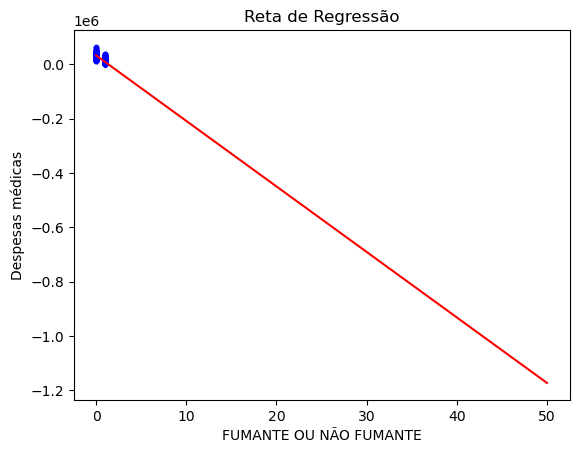

In [ ]:
# Negative linear correlation
plt.scatter(y= y_treino, x= x_treino, color = 'blue', s=10, alpha=0.9)
x_plot = np.linspace(0,50)
plt.plot(x_plot, x_plot*reg_linear2.coef_ +reg_linear2.intercept_, color='red')
plt.title('Reta de Regressão')
plt.ylabel('Despesas médicas')
plt.xlabel('FUMANTE OU NÃO FUMANTE')
plt.show()

In [ ]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

array([ 8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
        8478.76887371, 32579.4799556 ,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
       32579.4799556 ,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371, 32579.4799556 ,  8478.76887371, 32579.4799556 ,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
        8478.76887371,  8478.76887371, 32579.4799556 ,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
      

In [ ]:
# Calculating the score (accuracy of the predictions)
reg_linear2.score(x_teste, y_teste)

0.6197902354385711

In [ ]:
# Making predictions for different values
valor_despesas = reg_linear2.predict([[0]])
valor_despesas

array([32579.4799556])

## Métricas de desempenho

In [ ]:
# Absolute Error
abs(y_teste - previsoes_teste).mean()

5361.4579431801685

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_teste, previsoes_teste)

5361.4579431801685

In [ ]:
# Mean Squared Error
mean_squared_error(y_teste,previsoes_teste)

49373234.71633607

In [ ]:
# Square Root of Mean Squared Error
np.sqrt(mean_squared_error(y_teste,previsoes_teste))

7026.609048206402

## Cross Validation



Statistical technique used in machine learning to assess the generalization capability of a model, that is, how it performs on data not seen during training

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separating the data into folds
kfold = KFold(n_splits = 15, shuffle=True, random_state=5)

In [ ]:
# Creating the model
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv=kfold)
resultado

array([0.6828035 , 0.48697994, 0.70175622, 0.557086  , 0.60701629,
       0.56623409, 0.63480107, 0.41548201, 0.62212295, 0.65191741,
       0.59351143, 0.60447024, 0.70552853, 0.6279265 , 0.59229601])

In [ ]:
# We use the average and the standard deviation.
print("Score Médio: %.2f%%" %(resultado.mean()*100.0))

# Near to the other measures (test and training)

Score Médio: 60.33%


## EVALUATING SIMPLE LINEAR REGRESSION WITH STATSMODELS

Evaluating a simple linear regression model in statsmodels involves several key steps. First, the model is built using OLS (Ordinary Least Squares) and then fitted to the data. After fitting, the model's performance is evaluated by examining goodness-of-fit statistics (like R-squared), the significance of coefficients (using p-values), and analyzing residuals for patterns or violations of assumptions.

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [ ]:
x2 = df2.iloc[:, 4:5].values
x2

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [ ]:
y = df2.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
# Creating the model
regressao = smf.ols('y ~ x2',  data = df).fit()

In [ ]:
residuos = regressao.resid
residuos

0      -15165.307832
1       -6708.715998
2       -3984.806298
3       13550.202312
4       -4567.413098
            ...     
1333     2166.280002
1334    -6228.287498
1335    -6804.434798
1336    -6426.323298
1337    -2908.871532
Length: 1338, dtype: float64

## Normality test for the residuals

Ho = normal distribution : p > 0.05

Ha = distribution different from normal : p < 0.05

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

#The result of p is Non-Normal (p-value: 1.6723307933355808e-18)

Estatística de teste: 0.9608364701271057
p-valor: 1.6723307933355808e-18


In [ ]:
import scipy.stats as stats

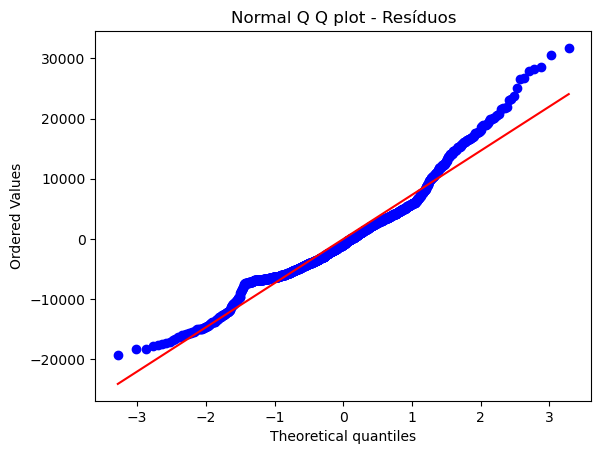

In [ ]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q Q plot - Resíduos')
plt.show()

# Graphic confirms non-normal distribuition

## Analysis of the Homoscedasticity of the Residuals

The analysis of homoscedasticity in the residuals of a linear regression model assesses whether the variance of the errors (residuals) is constant for all values of the independent variables. In other words, homoscedasticity assumes that the dispersion of the points around the regression line is the same, regardless of the value of the independent variable. If this variance is not constant, it is said that the model exhibits heteroscedasticity, which can undermine the validity of the statistical inferences based on the regression model.

In [ ]:
# Residues with constant variation

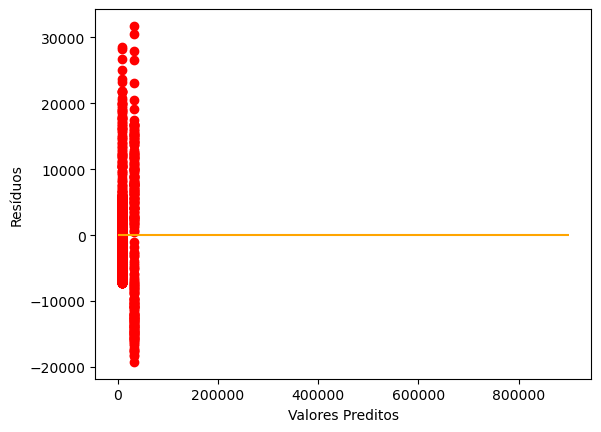

In [ ]:
plt.scatter(y= residuos, x= regressao.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=900000, color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

**Breuchs-Pagan Test (Homoscedasticity or heteroscedasticity)**

Ho = there is Homoscedasticity: p > 0.05

Ha = there is no homo: p < 0.05

In [ ]:
from statsmodels.compat  import lzip
import statsmodels.stats.api as sms

In [ ]:
estatistca, p , f, fp = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
print(f'Estatistica de teste : {estatistica}')
print( f'p- valor: {p}')
print(f'f-valor: {f}')
print(f'fp-valor: {fp}')


Estatistica de teste : 0.9608364701271057
p- valor: 2.826782603945669e-45
f-valor: 233.96681446096946
fp-valor: 8.597416429755618e-49


Test statistic: 0.9608364701271057

p-value: 2.826782603945669e-45

f-value: 233.96681446096946

fp-value: 8.597416429755618e-49

**There is no homoscedasticity in the residuals**

## Outliers of the residues

According to the theory, it should be between 3 and -3.

In [ ]:
outliers = regressao.outlier_test()

In [ ]:
outliers.max()

student_resid    4.281495
unadj_p          0.999338
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers.min()

student_resid   -2.583163
unadj_p          0.000020
bonf(p)          0.026614
dtype: float64

**With the three tests, we conclude that the MODEL IS NOT CONSISTENT**

# MULTIPLE LINEAR REGRESSION

In Multiple Linear Regression, we can use many dependent variables (x1,x2,...xn). So we can use all columns to predict y.

In [ ]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.9240
1,18,1,33.77,1,1,1,1725.5523


In [ ]:
independente = df2.iloc[:,0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  0.  ,  0.  ],
       [18.  ,  1.  , 33.77,  1.  ,  1.  ,  1.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  1.  ,  1.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  1.  ,  1.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  1.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  0.  ,  2.  ]])

In [ ]:
independente.shape

(1338, 6)

In [ ]:
dependente = df2.iloc[:,6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino,x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size =0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [ ]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
multipla.intercept_

10743.603360044035

In [ ]:
multipla.coef_

array([   256.5772619 ,    -49.39232379,    329.02381564,    479.08499828,
       -23400.28378787,    276.31576201])

In [ ]:
print( 'Equação:  Valor = {:.2f} +({:.2f})*age +({:.2f})*sex + ({:.2f})*bmi + ({:.2f})*children + ({:.2f})*smoker + ({:.2f})*region '.format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2],multipla.coef_[3],multipla.coef_[4], multipla.coef_[5]))

Equação:  Valor = 10743.60 +(256.58)*age +(-49.39)*sex + (329.02)*bmi + (479.08)*children + (-23400.28)*smoker + (276.32)*region 


y = 10743.60 +(256.58)*age +(-49.39)*sex + (329.02)*bmi + (479.08)*children + (-23400.28)*smoker + (276.32)*region

In [ ]:
# Score
multipla.score(x_treino, y_treino)

0.7306840408360217

## TEST

In [ ]:
previsoes = multipla.predict(x_teste)
previsoes

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      

In [ ]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [ ]:
# Score test
multipla.score(x_teste, y_teste)

0.7911113876316934

In [ ]:
# Making predictions for different values
valor_despesas = multipla.predict([[25,0,27,2,0,3]])
valor_despesas

array([27828.79521228])


## Metrics

In [ ]:
# Absolute Error
abs( y_teste - previsoes).mean()

4013.6929857812033

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_teste,previsoes)

4013.6929857812033

In [ ]:
# Mean Squared Error
mean_squared_error(y_teste,previsoes)

33311355.281859953

In [ ]:
# Root mean square error
np.sqrt(mean_squared_error(y_teste,previsoes))

5771.59902296235

## Cross-validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separating the data into folds
kfold = KFold(n_splits = 15, shuffle = True, random_state=5)

In [ ]:
# Creating the model
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)

resultado

array([0.80403115, 0.65635355, 0.81223444, 0.70626574, 0.72386761,
       0.64810671, 0.79500156, 0.56084118, 0.75978643, 0.79994218,
       0.72493994, 0.76469736, 0.77417662, 0.75945044, 0.75022414])

In [ ]:
# We use the average and the standard deviation.
print('Score médio: %.2f%%'%(resultado.mean()*100.0))

Score médio: 73.60%


MULTIPLE LINEAR REGRESSION IMPROVED RESULTS:

R^2 73.06%,

Average score: 73.60%,

test: 79.11%,
  
RMSE 5771.6

## Evaluating Multiple Linear Regression with StatsModels

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [ ]:
# Creating the model
modelo = smf.ols('charges ~ age + sex + bmi + children+ smoker+ region', data = df2).fit()

In [ ]:
residuos = modelo.resid
residuos

0       -8226.317864
1       -1962.052873
2       -2513.683707
3       18243.162205
4       -1670.785697
            ...     
1333    -1701.457702
1334    -1225.390847
1335    -2733.828866
1336      900.958387
1337    -7872.367796
Length: 1338, dtype: float64

## Normality test for residuals

In [ ]:
import scipy.stats as stats

Shapiro Wilk Test

Ho = normal distribution: p > 0.05

Ha = distribution different from normal: p <= 0.05

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('Estatistica de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.8990615606307983
p-valor: 8.660521172067415e-29


In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

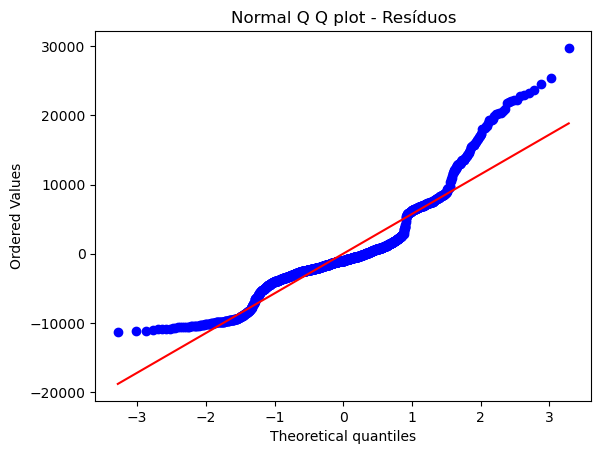

In [ ]:
stats.probplot(residuos, dist='norm', plot = plt)
plt.title('Normal Q Q plot - Resíduos')
plt.show

#Non-normal distribuition

## Analysis of the Homoscedasticity of Residuals

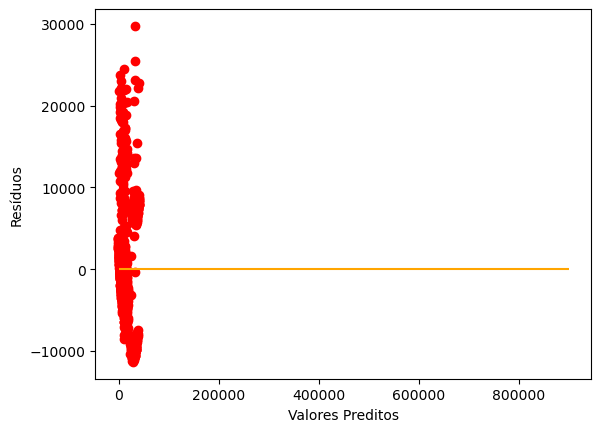

In [ ]:
plt.scatter(y = residuos, x= modelo.predict(), color = 'red')
plt.hlines(y=0, xmin=0, xmax= 900000,color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Breusch-Pagan Test (Homoscedasticity or Heteroscedasticity)

Ho = There is homoscedasticity: p > 0.05

Ha = there is no homoscedasticity: p <= 0.05

In [ ]:
from statsmodels.compat import lzip

In [ ]:
estatistica, p, f , fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
print('Estatistica de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('fp-valor: {}'.format(fp))

Estatistica de teste: 122.02901721776713
p-valor: 6.1066794722739144e-24
f-valor: 22.262129636407586
fp-valor: 4.365890698381456e-25


Test statistics: 122.02901721776713

p-valor: 6.1066794722739144e-24

f-valor: 22.262129636407586

fp-valor: 4.365890698381456e-25

**There is no homoscedasticity**



## Outliers in Residuals

In [ ]:
outliers = modelo.outlier_test()
#( between 3 e -3)

In [ ]:
outliers.max()

student_resid    4.966191
unadj_p          0.999820
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers.min()

student_resid   -1.880403e+00
unadj_p          7.713955e-07
bonf(p)          1.032127e-03
dtype: float64

**Outside the limit of the residual range**

## Absence of Multicollinearity

Only between independets variables

Considered multicollinearity when r>0.9

In [ ]:
variaveis = df2[['sex','age','bmi','smoker','children','region']]

In [ ]:
variaveis.head()

,sex,age,bmi,smoker,children,region
0,0,19,27.900,0,0,0
1,1,18,33.770,1,1,1
2,1,28,33.000,1,3,1
3,1,33,22.705,1,0,2
4,1,32,28.880,1,0,2


In [ ]:
correlacoes = variaveis.corr(method = 'pearson')
correlacoes

,sex,age,bmi,smoker,children,region
sex,1.000000,-0.020856,0.046371,-0.076185,0.017163,-0.004588
age,-0.020856,1.000000,0.109272,0.025019,0.042469,-0.002127
bmi,0.046371,0.109272,1.000000,-0.003750,0.012759,-0.157566
smoker,-0.076185,0.025019,-0.003750,1.000000,-0.007673,-0.002181
children,0.017163,0.042469,0.012759,-0.007673,1.000000,-0.016569
region,-0.004588,-0.002127,-0.157566,-0.002181,-0.016569,1.000000


In this test, all r values were less than 0.9, so there was no inconsistency, meaning there is an absence of multicollinearity.

## Analysis of the model

Model Analysis

Intercept

p-value for each coefficient <0.05 (statistically significant)

Adjusted R-squared (explains the model through the data)

p_value of the F statistic <0.05 (validates the regression model)

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:25:33   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.094e+04   1064.102     10.285      0.0

In [ ]:
# Creating a column with predictions
df2['previsao'] = modelo.fittedvalues

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,previsao
0,19,0,27.900,0,0,0,16884.92400,25111.241864
1,18,1,33.770,1,1,1,1725.55230,3687.605173
2,28,1,33.000,3,1,1,4449.46200,6963.145707
3,33,1,22.705,0,1,2,21984.47061,3741.308405
4,32,1,28.880,0,1,2,3866.85520,5537.640897


In [ ]:
import seaborn as sns

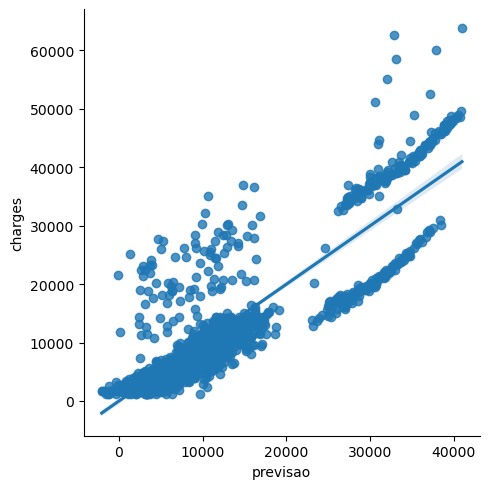

In [ ]:
sns.lmplot(x = 'previsao', y ='charges', data = df2);

# POLYNOMIAL REGRESSION

Let's first analyze based on the independent variable smoker, then I will provide a summary with the results and metrics using the others.

In [ ]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges,previsao
0,19,0,27.90,0,0,0,16884.9240,25111.241864
1,18,1,33.77,1,1,1,1725.5523,3687.605173


In [ ]:
x1 = df2.iloc[:,4:5].values
x1

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [ ]:
y = df2.iloc[:,6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state=0)

In [ ]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [ ]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [ ]:
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:

grau_polinomial = PolynomialFeatures (degree=2)

In [ ]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
polinomial = LinearRegression()

In [ ]:
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [ ]:
previsoes_treino = polinomial.predict(x_poly)

In [ ]:
polinomial.coef_

array([     0.        , -11370.39236828, -11370.39236828])

In [ ]:
polinomial.intercept_

31357.516267894738

y = 31357.52 - 11370.39*(numeros) - 11370.39*(numeros**2)

In [ ]:
numeros = np.linspace(0,1,936)
numeros

array([0.        , 0.00106952, 0.00213904, 0.00320856, 0.00427807,
       0.00534759, 0.00641711, 0.00748663, 0.00855615, 0.00962567,
       0.01069519, 0.01176471, 0.01283422, 0.01390374, 0.01497326,
       0.01604278, 0.0171123 , 0.01818182, 0.01925134, 0.02032086,
       0.02139037, 0.02245989, 0.02352941, 0.02459893, 0.02566845,
       0.02673797, 0.02780749, 0.02887701, 0.02994652, 0.03101604,
       0.03208556, 0.03315508, 0.0342246 , 0.03529412, 0.03636364,
       0.03743316, 0.03850267, 0.03957219, 0.04064171, 0.04171123,
       0.04278075, 0.04385027, 0.04491979, 0.0459893 , 0.04705882,
       0.04812834, 0.04919786, 0.05026738, 0.0513369 , 0.05240642,
       0.05347594, 0.05454545, 0.05561497, 0.05668449, 0.05775401,
       0.05882353, 0.05989305, 0.06096257, 0.06203209, 0.0631016 ,
       0.06417112, 0.06524064, 0.06631016, 0.06737968, 0.0684492 ,
       0.06951872, 0.07058824, 0.07165775, 0.07272727, 0.07379679,
       0.07486631, 0.07593583, 0.07700535, 0.07807487, 0.07914

In [ ]:
numeros.shape

(936,)

In [ ]:
valor = 31357.52 - 11370.39*(numeros) - 11370.39*(numeros**2)

In [ ]:
import matplotlib.pyplot as plt

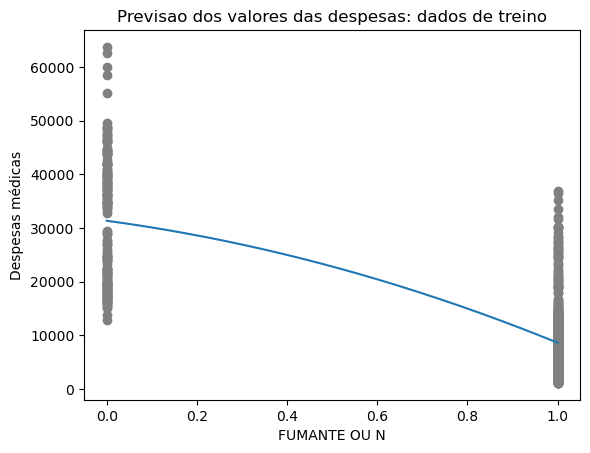

In [ ]:
plt.scatter(x_treino, y_treino, c = 'gray')
plt.xlabel('FUMANTE OU N')
plt.ylabel('Despesas médicas')
plt.title('Previsao dos valores das despesas: dados de treino')
plt.plot(numeros, valor);

In [ ]:
# Train Score
polinomial.score(x_poly, y_treino)

0.5934374063413763

## Test

In [ ]:
numeros2 = np.linspace(0,1, 402)
numeros2

array([0.        , 0.00249377, 0.00498753, 0.0074813 , 0.00997506,
       0.01246883, 0.01496259, 0.01745636, 0.01995012, 0.02244389,
       0.02493766, 0.02743142, 0.02992519, 0.03241895, 0.03491272,
       0.03740648, 0.03990025, 0.04239401, 0.04488778, 0.04738155,
       0.04987531, 0.05236908, 0.05486284, 0.05735661, 0.05985037,
       0.06234414, 0.06483791, 0.06733167, 0.06982544, 0.0723192 ,
       0.07481297, 0.07730673, 0.0798005 , 0.08229426, 0.08478803,
       0.0872818 , 0.08977556, 0.09226933, 0.09476309, 0.09725686,
       0.09975062, 0.10224439, 0.10473815, 0.10723192, 0.10972569,
       0.11221945, 0.11471322, 0.11720698, 0.11970075, 0.12219451,
       0.12468828, 0.12718204, 0.12967581, 0.13216958, 0.13466334,
       0.13715711, 0.13965087, 0.14214464, 0.1446384 , 0.14713217,
       0.14962594, 0.1521197 , 0.15461347, 0.15710723, 0.159601  ,
       0.16209476, 0.16458853, 0.16708229, 0.16957606, 0.17206983,
       0.17456359, 0.17705736, 0.17955112, 0.18204489, 0.18453

In [ ]:
numeros2.shape

(402,)

In [ ]:
valor2 = 31357.52 - 11370.39*(numeros2) - 11370.39*(numeros2**2)

In [ ]:
import matplotlib.pyplot as plt

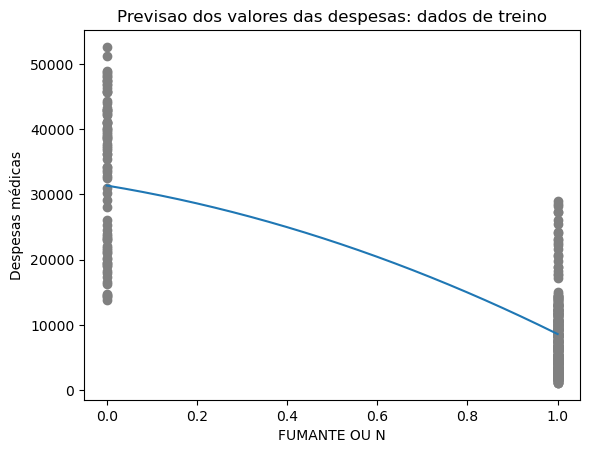

In [ ]:
plt.scatter(x_teste, y_teste, c = 'gray')
plt.xlabel('FUMANTE OU N')
plt.ylabel('Despesas médicas')
plt.title('Previsao dos valores das despesas: dados de treino')
plt.plot(numeros2, valor2);

In [ ]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 0.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
polinomial_teste = LinearRegression()

In [ ]:
polinomial_teste.fit(x_poly_teste, y_teste)

LinearRegression()

In [ ]:
# Test Score
polinomial.score(x_poly_teste,y_teste)

0.6713300243415389

In [ ]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)


**All the  RESULTS**


age: R^2 : 7% , RMSE:11805.9, valor = 4685.38 + 190.556*(numeros) + 0.5(numeros**2)

sex: R^2 0.07%, valor = 12655.64 + 591.16*(numeros) + 591.16*(numeros**2)

bmi: R^2 3% , valor = -5189.52 +  857.97*(numeros) - 8.09*(numeros**2)

children: R^2 1% , valor = 11933.29 +  2403.59*(numeros)  - 496.32*(numeros**2)

smoker: R^2 59,34%, TEST:67,13%,RMSE: 7145.00;    valor = 31357.52 - 11370.39*(numeros) - 11370.39*(numeros*2) BEST ONE

region: R^2 0.02%,valor = 12246.56 + 1935.28*(numeros) - 548.27*(numeros**2)

## Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_teste, previsoes_teste)

5450.31475203016

In [ ]:
# Mean Squared Error
mean_squared_error(y_teste,previsoes_teste)

51051133.31996683

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste,previsoes_teste))

7145.00758011962

# SUPPORT VECTOR REGRESSION

In [ ]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges,previsao
0,19,0,27.90,0,0,0,16884.9240,25111.241864
1,18,1,33.77,1,1,1,1725.5523,3687.605173


In [ ]:
df2 = df2.drop('previsao',axis = 1)


In [ ]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.9240
1,18,1,33.77,1,1,1,1725.5523


In [ ]:
independente.shape

(1338, 6)

In [ ]:
independente = df2.iloc[:,0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  0.  ,  0.  ],
       [18.  ,  1.  , 33.77,  1.  ,  1.  ,  1.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  1.  ,  1.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  1.  ,  1.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  1.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  0.  ,  2.  ]])

In [ ]:
dependente = df2.iloc[:,6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [ ]:
# Kernel = rbf, linear, polinomial(poly)
from sklearn.svm import SVR
SVR = SVR(kernel= 'poly')
SVR.fit(x_treino, y_treino)

# First test with 'rbf' gave a negative score
# Testing the others, results continue to be poor
# Let's scale up

In [ ]:
SVR.score(x_treino, y_treino)

-0.08493166241729777

In [ ]:
SVR.score(x_teste, y_teste)

-0.06989162097970669

In [ ]:
previsoes = SVR.predict(x_teste)
previsoes

array([9592.54846207, 9565.06017506, 9573.17372067, 9631.41823297,
       9579.93562918, 9491.06466224, 9434.54714497, 9588.74216148,
       9513.63527614, 9477.58633868, 9491.67983756, 9580.39194363,
       9542.03282578, 9485.69807341, 9459.72690764, 9581.21507669,
       9624.78321253, 9457.25522702, 9513.24862795, 9439.05895837,
       9585.03383768, 9612.89206077, 9592.96259671, 9564.56481657,
       9445.03341227, 9485.85116384, 9466.68887913, 9525.9630134 ,
       9476.17945282, 9554.08587667, 9524.47374131, 9623.16676208,
       9634.7513124 , 9607.99250112, 9451.27582716, 9472.07641515,
       9561.84669975, 9467.49938628, 9526.09482109, 9439.84922181,
       9501.26807603, 9467.47976397, 9518.29909298, 9621.1988175 ,
       9438.91329856, 9441.92483367, 9581.06479718, 9535.14195739,
       9472.40773404, 9612.7627276 , 9448.8474407 , 9436.33101637,
       9570.20627357, 9588.92482347, 9618.83798669, 9466.80230509,
       9458.87524094, 9580.45051792, 9540.66084205, 9624.84420

## Standardization of scale

The StandardScaler is a preprocessing tool in machine learning, commonly used to standardize features by removing the mean and scaling to unit variance. It is part of the sklearn.preprocessing module in Python's Scikit-learn library. Centers the data by subtracting the mean of each feature and divides each feature by its standard deviation, ensuring all features have a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [ ]:
x_treino_scaler

array([[-1.5330973 , -0.97676557, -0.40713453, -0.89833872,  0.50466988,
         1.40820029],
       [-0.03364163, -0.97676557,  0.32855417, -0.89833872,  0.50466988,
        -1.31322188],
       [ 0.89459283, -0.97676557,  2.56690911,  3.25603402,  0.50466988,
        -0.40608116],
       ...,
       [ 0.03776102,  1.02378711, -0.91016269, -0.89833872,  0.50466988,
        -0.40608116],
       [-1.46169465,  1.02378711,  0.76659782, -0.89833872,  0.50466988,
         0.50105957],
       [-0.46205754, -0.97676557, -1.96596021, -0.06746417,  0.50466988,
        -1.31322188]])

In [ ]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [ ]:
y_treino_scaler

array([[-9.29114569e-01],
       [-6.38651947e-01],
       [-5.39325234e-02],
       [-4.89603748e-01],
       [-6.71349717e-01],
       [-9.67549383e-01],
       [ 1.99311860e+00],
       [-7.49986519e-03],
       [-5.43346082e-01],
       [-2.11871148e-02],
       [-3.93810261e-01],
       [-6.34346126e-02],
       [ 2.99749417e+00],
       [-8.24494558e-01],
       [-4.46162315e-01],
       [ 2.82436277e-01],
       [ 1.14345861e-01],
       [-9.85403479e-01],
       [-5.30554176e-01],
       [-9.27713303e-01],
       [-1.15928290e-01],
       [ 5.03782109e-01],
       [-1.43008068e-01],
       [ 2.33634863e+00],
       [-7.02715735e-01],
       [ 1.74120307e+00],
       [ 2.98421635e-01],
       [-1.89528398e-01],
       [-4.38466738e-01],
       [ 2.63340976e+00],
       [-4.17078733e-01],
       [-7.99784555e-01],
       [-3.51547052e-01],
       [ 4.66138790e-01],
       [ 1.93407799e+00],
       [ 4.94776882e-01],
       [ 1.04631189e+00],
       [ 2.18064123e+00],
       [-7.8

In [ ]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[ 0.89459283,  1.02378711, -0.08863026, -0.06746417,  0.50466988,
        -1.31322188],
       [ 0.53757957, -0.97676557, -0.22180837, -0.06746417,  0.50466988,
        -0.40608116],
       [ 0.60898222,  1.02378711,  1.57449152,  0.76341038, -1.98149332,
         0.50105957],
       ...,
       [ 1.10880078,  1.02378711,  1.20785059, -0.89833872,  0.50466988,
        -0.40608116],
       [ 1.75142463,  1.02378711,  1.34905148, -0.06746417,  0.50466988,
        -0.40608116],
       [ 1.60861933, -0.97676557, -0.92299913, -0.89833872,  0.50466988,
        -1.31322188]])

In [ ]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

In [ ]:
from sklearn.svm import SVR
SVR2 = SVR(kernel = 'rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())


SVR()

Testing again, first we tested with the rbf parameter, and it gave an R^2 score of 84.20% and a test score of 87.8%

Testing with linear, 84.20% and a test score of 76%

Testing with the poly kernel, 82.20% and a test score of 86.59%

Testing sigmoid turned out terrible

BEST KERNEL: rbf

In [ ]:
SVR2.score(x_treino_scaler, y_treino_scaler)

0.8420229069432991

## Test

In [ ]:
SVR2.score(x_teste_scaler, y_teste_scaler)

0.8779179694492559

In [ ]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

array([-2.05665635e-01, -3.01639114e-01,  3.05461110e+00,  4.81890296e-02,
       -1.67926566e-01, -6.77847665e-01, -8.31644843e-01, -5.80607713e-02,
       -4.15897935e-01, -6.32058389e-01, -4.08214600e-01, -1.60495633e-01,
       -4.04433414e-01, -6.78967821e-01,  6.23568654e-01, -1.25514334e-01,
        3.26524022e-02, -7.07351192e-01, -4.80064138e-01,  1.00067407e+00,
        9.11553783e-01,  5.93619741e-02, -1.57576352e-01,  1.18577305e+00,
       -8.78041117e-01, -6.09796828e-01, -6.73348083e-01, -3.98291773e-01,
       -7.14303243e-01, -3.12013326e-01, -3.81421319e-01,  3.04304802e+00,
        6.91257155e-02, -1.52163877e-01, -6.29203522e-04, -6.76270955e-01,
       -3.24841864e-01,  2.23481088e+00,  2.22302133e+00, -8.60768151e-01,
       -5.36217853e-01, -7.87401356e-01,  7.40612945e-01,  3.06279942e+00,
        2.00897357e+00, -7.10066698e-01, -1.27254654e-01, -4.36845865e-01,
       -6.34058305e-01, -4.56142172e-03, -7.88141841e-01, -6.63679643e-01,
        1.42569667e+00,  

In [ ]:
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

## Reverting the transformation




In [ ]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1,1))

# HERE WE ARE REVERTING THE ESCALATION, TO CALCULATE THE METRICS

In [ ]:
y_teste_inverse

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [ ]:
previsoes_inverse

array([[10790.89158259],
       [ 9651.32530153],
       [49502.64287358],
       [13805.10155454],
       [11238.9963192 ],
       [ 5184.31435867],
       [ 3358.1632138 ],
       [12543.51666488],
       [ 8294.64320444],
       [ 5728.00533856],
       [ 8385.87329851],
       [11327.22945547],
       [ 8430.77020235],
       [ 5171.01389531],
       [20637.02249598],
       [11742.58909359],
       [13620.62333169],
       [ 4833.99648711],
       [ 7532.74895953],
       [25114.68258215],
       [24056.48949223],
       [13937.76644245],
       [11361.89230294],
       [27312.50395897],
       [ 2807.26488269],
       [ 5992.33382712],
       [ 5237.74132638],
       [ 8503.69458986],
       [ 4751.4494925 ],
       [ 9528.14437107],
       [ 8704.01035724],
       [49365.34554629],
       [14053.69878736],
       [11426.15875117],
       [13225.44545406],
       [ 5203.03583956],
       [ 9375.82136442],
       [39768.52985907],
       [39628.54348045],
       [ 3012.35997328],


## Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Absolute error
mean_absolute_error(y_teste_inverse,previsoes_inverse)

2449.2570769616555

In [ ]:
# Mean Squared Error
mean_squared_error(y_teste_inverse,previsoes_inverse)

19468356.111420725

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste_inverse,previsoes_inverse))

4412.296013576234

## Cross Validation

### Standardization of Scale

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [ ]:
independente_scaler

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         0.46691549]])

In [ ]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separating the data into folds
kfold = KFold(n_splits = 15, shuffle=True, random_state=5)

In [ ]:
# Creating the model
from sklearn.svm import SVR
modelo = SVR(kernel = 'rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv=kfold)
resultado

array([0.90259745, 0.80358972, 0.88424444, 0.84111929, 0.83133121,
       0.74992377, 0.90977249, 0.67729737, 0.83081009, 0.88170447,
       0.83334191, 0.85319396, 0.85749765, 0.83439254, 0.83385632])

In [ ]:
# We use the average and the standard deviation.
print('Coeficiente de determinação médio %.2f%% ' % (resultado.mean()*100.0))

Coeficiente de determinação médio 83.50% 


BEST KERNEL: rbf

R^2:84.20%

test 87.8%

cross-validation:  83.50%

RMSE: 4412.3

#SUPPORT VECTOR REGRESSION

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [ ]:
independente = df2.iloc[:,0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  0.  ,  0.  ],
       [18.  ,  1.  , 33.77,  1.  ,  1.  ,  1.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  1.  ,  1.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  1.  ,  1.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  1.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  0.  ,  2.  ]])

In [ ]:
independente.shape

(1338, 6)

In [ ]:
dependente = df2.iloc[:,6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
dependente.shape


(1338,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [ ]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=4, random_state= 10)
arvore.fit(x_treino, y_treino)

# Hyperparameters:
# We started with max_depth=5, random_state=10, we had an R^2 of 87.53 and a test of 82.39%.
# Changing max_depth to 2 worsened R^2 to 81% and improved the test to 85.7%. At 3, R^2 improved to 84.19% and the test to 87.5%. At 4, it improved to 85.3% and 88.3%. 6 and above causes overfitting. BEST is 4.

DecisionTreeRegressor(max_depth=4, random_state=10)

In [ ]:
arvore.score(x_treino, y_treino)

0.8530071656927247

## Teste

In [ ]:
arvore.score(x_teste, y_teste)

0.8825247044517013

In [ ]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

array([12810.15616227,  9945.94338346, 42427.3431159 , 15510.42604873,
        9945.94338346,  7587.9965524 ,  3507.23013895,  9945.94338346,
        7587.9965524 ,  7587.9965524 ,  7587.9965524 ,  9945.94338346,
        9945.94338346,  6102.10529302, 19440.44307825,  9945.94338346,
       15510.42604873,  3507.23013895,  7587.9965524 , 35054.04803476,
       23441.76549652, 12810.15616227, 12810.15616227, 27422.03897471,
        3507.23013895,  7587.9965524 ,  7587.9965524 ,  6102.10529302,
        6102.10529302,  9945.94338346,  7587.9965524 , 47616.89780818,
       15510.42604873, 12810.15616227, 19440.44307825,  7587.9965524 ,
        9945.94338346, 39137.27603917, 42427.3431159 ,  3507.23013895,
        7587.9965524 ,  6102.10529302, 19440.44307825, 47616.89780818,
       39137.27603917,  3507.23013895,  9945.94338346,  7587.9965524 ,
        7587.9965524 , 12810.15616227,  3507.23013895,  3507.23013895,
       27422.03897471, 47616.89780818, 12810.15616227,  7587.9965524 ,
      

In [ ]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

## Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_teste, previsoes_teste)

2595.096071046259

In [ ]:
# Mean Squared Error
mean_squared_error(y_teste, previsoes_teste)

18733722.544679113

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4328.247052177026

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separating the data into folds
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv=kfold)
resultado

array([0.91127325, 0.81901877, 0.88672059, 0.7692046 , 0.87075135,
       0.76383865, 0.9013885 , 0.63250802, 0.85136365, 0.8305891 ,
       0.80959701, 0.86454659, 0.86038145, 0.8424176 , 0.84221843])

In [ ]:
# We use the average and the standard deviation.
print('Coeficiente de determinação médio %.2f%%' %(resultado.mean()*100.0))

Coeficiente de determinação médio 83.04%


Best results :

tree = DecisionTreeRegressor(max_depth=4, random_state=10)

RMSE: 4328.25, R^2: 85.3% and test: 88.3%, CROSS-VALIDATION: 83.04%

#REGRESSION WITH RANDOM FOREST

In [ ]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.9240
1,18,1,33.77,1,1,1,1725.5523


In [ ]:
independente = df2.iloc[:,0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  0.  ,  0.  ],
       [18.  ,  1.  , 33.77,  1.  ,  1.  ,  1.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  1.  ,  1.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  1.  ,  1.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  1.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  0.  ,  2.  ]])

In [ ]:
independente.shape

(1338, 6)

In [ ]:
dependente = df2.iloc[:,6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
dependente.shape

(1338,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [ ]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random = RandomForestRegressor(n_estimators = 60, criterion = 'squared_error', max_depth=6, random_state=10)
random.fit(x_treino, y_treino)

# We started with: n_estimators = 60, criterion = 'squared_error', max_depth=5, random_state=10, R^2 88.3% and test 88.6%
# Let's first change n_estimators; 100 didn't change, 150 and 200 got a bit worse. I left it at 60.
# Criterion: best is squared_error
# max_depth: 6 90.5%,  R^2 and test 88.23%

RandomForestRegressor(max_depth=6, n_estimators=60, random_state=10)

In [ ]:
random.score(x_treino, y_treino)

0.9050047955733709

## Test

In [ ]:
random.score(x_teste, y_teste)

0.8823381713113936

In [ ]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

array([11369.14838171, 10604.29731458, 45034.20341945, 13914.3024397 ,
       11119.13105634,  8036.06333393,  2611.04493002, 12977.3185184 ,
        7126.19053571,  6524.76656767,  7820.59390396, 14026.31515451,
        8479.63430597,  5956.05059403, 22561.5966295 , 12379.57501914,
       13954.62604755,  5652.83645934,  7047.27812329, 34552.13908846,
       23851.51116766, 15510.86536521, 12174.13057304, 26190.17843636,
        3369.80415234,  7715.17158999,  6996.13567236,  7206.37840673,
        4376.56794682,  9397.8366805 ,  7149.704091  , 47323.79824172,
       14016.0181652 , 11498.78418513, 17192.2936686 ,  5065.8934017 ,
        9137.05705416, 38100.59536827, 39820.84168644,  3386.61679644,
        8032.71645627,  4403.1190699 , 20117.83391008, 46952.87452953,
       38144.97519055,  3877.25279142, 12424.00506083,  7030.40454429,
        6501.97963997, 12858.54446378,  3838.96963561,  3636.30975468,
       26343.1079707 , 47597.03287656, 11491.0518718 ,  7647.65845496,
      

In [ ]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

## Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_teste, previsoes_teste)

2559.5015732168786

In [ ]:
# Mean Squared Error
mean_squared_error(y_teste, previsoes_teste)

18763468.884789187

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4331.681992573923

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separating the data into folds
kfold = KFold(n_splits = 12, shuffle= True, random_state=5)

In [ ]:
# Creating the model
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators = 60, criterion = 'squared_error', max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente,cv = kfold)
resultado

array([0.92652328, 0.86504066, 0.84967149, 0.89800914, 0.80687181,
       0.8487154 , 0.78035233, 0.88055338, 0.83019674, 0.88847061,
       0.85481774, 0.85962959])

In [ ]:
# We use the average and the standard deviation.
print('Coeficiente de determinação médio: %2.f%%' % (resultado.mean()*100.0))

Coeficiente de determinação médio: 86%


Best results:

RMSE: 4331.68, Cross-validation: 86%, R^2: 90.5%, test: 88.23%

# REGRESSION WITH XGBOOST

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [ ]:
independente = df2.iloc[:,0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  0.  ,  0.  ],
       [18.  ,  1.  , 33.77,  1.  ,  1.  ,  1.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  1.  ,  1.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  1.  ,  1.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  1.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  0.  ,  2.  ]])

In [ ]:
independente.shape

(1338, 6)

In [ ]:
dependente = df2.iloc[:,6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
dependente.shape

(1338,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgboost = XGBRegressor(n_estimators = 240, max_depth=4, learning_rate = 0.05, objective='reg:squarederror')
xgboost.fit(x_treino,y_treino)

# Initial: n_estimators = 180, max_depth = 3, learning_rate = 0.05, objective='reg:squarederror', R^2 88.9% and test: 89%
# Let's start with n_estimators: 100 got worse, 200 improved to 89% R^2 and the same for the test. 220 improved, 240 maximum.
# Max_depth: limit 4. 92.4% and 88%
# Learning_rate: 0.01 got worse. 0.03 stayed the same. best 0.05

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=240, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgboost.score(x_treino, y_treino)

0.9236113440809999

## Test

In [ ]:
xgboost.score(x_teste,y_teste)

0.8790060549780897

In [ ]:
previsoes_teste = xgboost.predict(x_teste)
previsoes_teste

array([11573.227 ,  9935.334 , 46490.88  , 13312.707 , 10227.513 ,
        4800.702 ,  2108.5637, 14019.207 ,  7455.348 ,  6180.3496,
        7326.821 , 13895.642 ,  9221.361 ,  6413.2163, 20760.918 ,
       13052.93  , 14932.272 ,  7078.052 ,  6741.856 , 34569.785 ,
       23416.44  , 18217.963 , 11736.048 , 27112.115 ,  3023.8606,
       10042.142 ,  6345.4595,  8061.5205,  4052.5315,  9830.965 ,
        7176.433 , 48126.63  , 15576.295 , 11459.231 , 16275.4375,
        5086.4707, 12073.528 , 35790.03  , 38402.12  ,  3057.1768,
        5588.5024,  4927.038 , 20053.818 , 49837.78  , 36485.977 ,
        4271.733 , 13324.896 ,  6946.0103,  6519.435 , 12363.385 ,
        5613.557 ,  3910.6562, 27212.676 , 48771.363 , 11145.205 ,
        7500.2534,  3706.0017, 11437.456 ,  9059.799 , 17954.787 ,
        1905.9141, 44393.312 , 17469.83  , 12873.274 , 15022.544 ,
        8660.35  , 33524.895 , 39537.793 ,  2696.5486,  8202.687 ,
       15015.906 , 13219.216 , 17411.146 , 14380.396 , 14671.8

## Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_teste, previsoes_teste)

2653.3138872019204

In [ ]:
#Mean Squared  Error
mean_squared_error(y_teste, previsoes_teste)

19294839.694144115

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4392.589178849316

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separating the data into folds
kfold = KFold(n_splits=15, shuffle = True, random_state=5)

In [ ]:
# Creating the model
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators = 240, max_depth =4, learning_rate = 0.05, objective = 'reg:squarederror')
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.91258108, 0.81546008, 0.89204829, 0.82703148, 0.86671911,
       0.77483753, 0.92097355, 0.67168802, 0.84207594, 0.8682789 ,
       0.83750154, 0.86976249, 0.86906022, 0.85698703, 0.83801826])

In [ ]:
# We use the average and the standard deviation.
print(f'Coeficiente de determinação médio: {resultado.mean()*100.0} %')

Coeficiente de determinação médio: 84.42015683919946 %


Best Results:

 n_estimators = 240, max_depth = 4, learning_rate = 0.05, objective = 'reg:squarederror'

 RMSE: 4392.58, R^2 92.4%, and test: 89%, Cross-validation: 84.4%

# REGRESSION WITH LIGHTGBM

In [ ]:
# Installation of the algorithm
!pip install lightgbm

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [ ]:
independente = df2.iloc[:,0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  0.  ,  0.  ],
       [18.  ,  1.  , 33.77,  1.  ,  1.  ,  1.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  1.  ,  1.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  1.  ,  1.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  1.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  0.  ,  2.  ]])

In [ ]:
independente.shape

(1338, 6)

In [ ]:
dependente = df2.iloc[:,6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
dependente.shape

(1338,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth = 5, learning_rate=0.1, n_estimators= 50)
lgbm.fit(x_treino, y_treino)

# We started with: num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50, R^2 86.9%, TEST: 89.5%
# We will change num_leaves: 30 did not change, 20 did not either, no value changed
# max_depth: 4 improved, 2 worsened, 5 better
# Learning_rate: 0.05 worsened, 0.06 worsened, better 0.1
# n_estimators: 30 worsened, 20 worsened, better 50

LGBMRegressor(max_depth=5, n_estimators=50, num_leaves=50)

In [ ]:
lgbm.score(x_treino, y_treino)

0.8907562043916923

## Test

In [ ]:
lgbm.score(x_teste, y_teste)

0.8853793324623853

In [ ]:
previsoes_teste = lgbm.predict(x_teste)
previsoes_teste

array([12814.04857036, 10176.02815369, 45681.85168931, 13930.16949521,
       10178.94434007,  5775.27886237,  3317.60425295, 12842.57322586,
        7807.19436283,  6615.60725333,  7283.28217662, 12738.45031561,
        9502.35408115,  5882.2398193 , 19977.75705223, 12538.56728891,
       14743.2277701 ,  6674.00161377,  7563.23138242, 35088.65016938,
       24006.46983463, 14434.23698551, 12664.84897002, 26275.91366953,
        3405.68971922,  7438.24908321,  5509.40205497,  7751.46791411,
        4887.29113338, 10166.5345583 ,  7903.99017642, 48041.96414234,
       14204.56722238, 12124.29523207, 16970.24009546,  6138.10555207,
        9701.64118619, 37500.06374895, 38752.90464849,  3405.68971922,
        6418.60360112,  4943.01410524, 20630.40009724, 47289.83950366,
       37801.18103506,  5135.82048819, 12538.56728891,  7555.60478857,
        6404.53174709, 12368.21777479,  5759.42717802,  4095.1814258 ,
       26275.91366953, 47158.66580945, 11676.0836619 ,  6523.67464745,
      

In [ ]:
# Making predictions for different values
valor_despesas = lgbm.predict([[33,1,23,3,1,2]])
valor_despesas


array([6561.0993911])

## Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Absolute error
mean_absolute_error(y_teste, previsoes_teste)

2451.001348159619

In [ ]:
# Mean Squared Error
mean_squared_error(y_teste, previsoes_teste)

16757777.94849712

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4093.626503297183

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separating the data into folds
kfold = KFold(n_splits=15, shuffle = True, random_state=5)

In [ ]:
# Creating the model
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=50, max_depth = 5, learning_rate=0.1, n_estimators= 50)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.92079801, 0.84033841, 0.89176158, 0.85726305, 0.88169394,
       0.7734847 , 0.92406242, 0.67329415, 0.84127449, 0.87226921,
       0.85583883, 0.87520782, 0.87057109, 0.85595887, 0.84837655])

In [ ]:
# We use the average and the standard deviation.
print(f'Coeficiente de determinação médio: {resultado.mean()*100.0} %')

Coeficiente de determinação médio: 85.21462079718958 %


Best result:

num_leaves=50, max_depth=5, learning_rate=0.1, n_estimators=50

RMSE: 4093.6, R^2 89% and test: 88.5%, cross-validation: 85.21%

# REGRESSION WITH CATBOOST

In [ ]:
# Installation of the algorithm
!pip install catboost

In [ ]:
# The Catboost algorithm performs its own replacement of nominal variables.

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.9240
1,18,1,33.77,1,1,1,1725.5523


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
independente = df.iloc[:,0:6].values

In [ ]:
independente

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
dependente = df.iloc[:,6].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [ ]:
categoricas = ['sex','smoker','region']

In [ ]:
catboost = CatBoostRegressor(iterations = 100, learning_rate=0.09, depth = 6, random_state=10)
catboost.fit(x_treino, y_treino, cat_features= categoricas, plot= True, eval_set=(x_teste,y_teste))

# We started with: iterations = 100, learning_rate=0.08, depth = 5, random_state=10, R^2: 86.5%, test 89.5%
# iterations: 200 did not improve, 150 did not improve, 50 got worse. Keep 100
# depth: 3 got worse, 6 improved a bit, 7 did not improve. best 67
# learning_rate: 0.05 got worse. best 0.09

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 11095.6196703	test: 11745.8431149	best: 11745.8431149 (0)	total: 30.7ms	remaining: 3.04s
1:	learn: 10480.7384915	test: 11066.7154136	best: 11066.7154136 (1)	total: 72.5ms	remaining: 3.55s
2:	learn: 9870.0051187	test: 10374.5232990	best: 10374.5232990 (2)	total: 112ms	remaining: 3.62s
3:	learn: 9310.3581515	test: 9723.3326858	best: 9723.3326858 (3)	total: 160ms	remaining: 3.85s
4:	learn: 8831.3468129	test: 9197.8329174	best: 9197.8329174 (4)	total: 202ms	remaining: 3.83s
5:	learn: 8359.4480673	test: 8649.1604001	best: 8649.1604001 (5)	total: 242ms	remaining: 3.79s
6:	learn: 7949.7266335	test: 8193.2620245	best: 8193.2620245 (6)	total: 288ms	remaining: 3.83s
7:	learn: 7564.7502257	test: 7743.5303637	best: 7743.5303637 (7)	total: 323ms	remaining: 3.71s
8:	learn: 7205.5779967	test: 7316.2933971	best: 7316.2933971 (8)	total: 365ms	remaining: 3.69s
9:	learn: 6913.7244577	test: 6983.6163957	best: 6983.6163957 (9)	total: 406ms	remaining: 3.65s
10:	learn: 6648.0549876	test: 6683.45689

89:	learn: 4189.4747516	test: 4134.1100316	best: 4124.5788100 (82)	total: 3.56s	remaining: 395ms
90:	learn: 4189.1702260	test: 4134.0805752	best: 4124.5788100 (82)	total: 3.58s	remaining: 354ms
91:	learn: 4170.6867769	test: 4125.5508184	best: 4124.5788100 (82)	total: 3.62s	remaining: 315ms
92:	learn: 4169.3606575	test: 4126.5381645	best: 4124.5788100 (82)	total: 3.67s	remaining: 276ms
93:	learn: 4160.4120632	test: 4128.2930213	best: 4124.5788100 (82)	total: 3.71s	remaining: 237ms
94:	learn: 4157.8502097	test: 4128.4593409	best: 4124.5788100 (82)	total: 3.76s	remaining: 198ms
95:	learn: 4156.8861608	test: 4128.5338159	best: 4124.5788100 (82)	total: 3.81s	remaining: 159ms
96:	learn: 4155.6529303	test: 4128.3903606	best: 4124.5788100 (82)	total: 3.85s	remaining: 119ms
97:	learn: 4153.2049933	test: 4129.7634297	best: 4124.5788100 (82)	total: 3.89s	remaining: 79.4ms
98:	learn: 4142.4178731	test: 4129.9809610	best: 4124.5788100 (82)	total: 3.93s	remaining: 39.7ms
99:	learn: 4138.3305245	test

In [ ]:
catboost.score(x_treino, y_treino)

0.8728154139829343

## Test

In [ ]:
catboost.score(x_teste, y_teste)

0.893320328352347

In [ ]:
previsoes_teste = catboost.predict(x_teste)
previsoes_teste

array([11843.10791193, 10928.27076228, 45666.35945135, 13844.09364095,
       11135.96800131,  5106.81432862,  3133.32859134, 13837.01535267,
        8793.8294815 ,  7060.58037245,  6709.28744892, 12576.61441624,
        8756.56311956,  5506.20907548, 19999.25372664, 12774.15429198,
       14385.20792723,  5903.33971553,  7906.41322946, 32490.87781198,
       24554.97941953, 14516.57513606, 11199.59426794, 25591.32984992,
        4201.93370466,  7700.01339577,  4027.95655742,  8619.20159374,
        5309.11019207,  9987.62698306,  8573.27452964, 47049.30017963,
       14228.54057851, 11530.83280417, 17362.2876606 ,  5448.42287967,
       11020.17122781, 37879.87646714, 41104.20849779,  3332.16678724,
        5561.05014188,  4611.33587517, 20915.80732325, 46608.16911318,
       38601.90920084,  5180.65764052, 12799.63379565,  8108.33077933,
        5592.06067802, 13059.11630885,  3952.34157176,  5532.62574001,
       25067.3680846 , 45108.70500011, 12552.65417734,  5352.42988752,
      


## Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_teste, previsoes_teste)

2451.181490842484

In [ ]:
# Mean Squared Error
mean_squared_error(y_teste, previsoes_teste)

16755441.72237144

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4093.341144147583

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separating the data into folds
kfold = KFold(n_splits=15, shuffle = True, random_state=5)

In [ ]:
# Creating the model
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor(iterations = 100, learning_rate=0.09, depth = 6, random_state=10)
independente = df2.iloc[:,0:6]
dependente = df2.iloc[:,6]
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

0:	learn: 11308.7631272	total: 155ms	remaining: 15.3s
1:	learn: 10715.4621310	total: 157ms	remaining: 7.68s
2:	learn: 10017.5993198	total: 161ms	remaining: 5.19s
3:	learn: 9421.7464698	total: 164ms	remaining: 3.95s
4:	learn: 8868.7924856	total: 168ms	remaining: 3.2s
5:	learn: 8389.7948409	total: 172ms	remaining: 2.7s
6:	learn: 7954.8496460	total: 176ms	remaining: 2.34s
7:	learn: 7544.0116342	total: 180ms	remaining: 2.07s
8:	learn: 7169.6140148	total: 184ms	remaining: 1.86s
9:	learn: 6862.7515287	total: 187ms	remaining: 1.68s
10:	learn: 6572.8350819	total: 190ms	remaining: 1.54s
11:	learn: 6329.2372582	total: 193ms	remaining: 1.42s
12:	learn: 6076.1179265	total: 196ms	remaining: 1.31s
13:	learn: 5901.0099562	total: 199ms	remaining: 1.22s
14:	learn: 5709.2391192	total: 202ms	remaining: 1.15s
15:	learn: 5528.0888499	total: 206ms	remaining: 1.08s
16:	learn: 5373.9060416	total: 208ms	remaining: 1.01s
17:	learn: 5237.5133981	total: 212ms	remaining: 964ms
18:	learn: 5133.9837188	total: 215ms	

54:	learn: 4241.9419452	total: 197ms	remaining: 161ms
55:	learn: 4237.4465091	total: 201ms	remaining: 158ms
56:	learn: 4233.2425288	total: 204ms	remaining: 154ms
57:	learn: 4229.4270884	total: 207ms	remaining: 150ms
58:	learn: 4221.8692681	total: 211ms	remaining: 147ms
59:	learn: 4214.8748406	total: 215ms	remaining: 144ms
60:	learn: 4209.7288921	total: 219ms	remaining: 140ms
61:	learn: 4208.7657608	total: 220ms	remaining: 135ms
62:	learn: 4200.5013629	total: 224ms	remaining: 132ms
63:	learn: 4194.1446644	total: 228ms	remaining: 128ms
64:	learn: 4188.6328688	total: 231ms	remaining: 124ms
65:	learn: 4180.3594765	total: 235ms	remaining: 121ms
66:	learn: 4169.0984454	total: 240ms	remaining: 118ms
67:	learn: 4161.6762321	total: 243ms	remaining: 115ms
68:	learn: 4157.6612750	total: 247ms	remaining: 111ms
69:	learn: 4156.2988521	total: 249ms	remaining: 107ms
70:	learn: 4150.2582493	total: 253ms	remaining: 103ms
71:	learn: 4140.2346934	total: 257ms	remaining: 100ms
72:	learn: 4132.0754774	tota

50:	learn: 4209.7790045	total: 185ms	remaining: 178ms
51:	learn: 4205.0235725	total: 189ms	remaining: 175ms
52:	learn: 4198.3082059	total: 192ms	remaining: 171ms
53:	learn: 4193.8419892	total: 196ms	remaining: 167ms
54:	learn: 4188.0841856	total: 200ms	remaining: 164ms
55:	learn: 4182.9402428	total: 203ms	remaining: 160ms
56:	learn: 4178.1250218	total: 207ms	remaining: 156ms
57:	learn: 4174.7404127	total: 211ms	remaining: 153ms
58:	learn: 4168.1053196	total: 215ms	remaining: 149ms
59:	learn: 4163.5161776	total: 219ms	remaining: 146ms
60:	learn: 4157.7160893	total: 222ms	remaining: 142ms
61:	learn: 4156.4119862	total: 224ms	remaining: 137ms
62:	learn: 4147.6779290	total: 228ms	remaining: 134ms
63:	learn: 4142.2689416	total: 231ms	remaining: 130ms
64:	learn: 4137.3647549	total: 234ms	remaining: 126ms
65:	learn: 4130.9904416	total: 237ms	remaining: 122ms
66:	learn: 4127.3080303	total: 240ms	remaining: 118ms
67:	learn: 4124.1458946	total: 244ms	remaining: 115ms
68:	learn: 4118.5833486	tota

57:	learn: 4137.6594849	total: 198ms	remaining: 143ms
58:	learn: 4135.2616765	total: 200ms	remaining: 139ms
59:	learn: 4125.1866745	total: 204ms	remaining: 136ms
60:	learn: 4118.9435836	total: 207ms	remaining: 133ms
61:	learn: 4115.1866674	total: 211ms	remaining: 129ms
62:	learn: 4106.2109838	total: 215ms	remaining: 126ms
63:	learn: 4096.1856042	total: 218ms	remaining: 123ms
64:	learn: 4093.3871156	total: 222ms	remaining: 120ms
65:	learn: 4088.2500652	total: 226ms	remaining: 116ms
66:	learn: 4084.6158939	total: 229ms	remaining: 113ms
67:	learn: 4079.5445869	total: 232ms	remaining: 109ms
68:	learn: 4075.5736682	total: 236ms	remaining: 106ms
69:	learn: 4071.0901945	total: 240ms	remaining: 103ms
70:	learn: 4066.0278467	total: 244ms	remaining: 99.6ms
71:	learn: 4063.0094714	total: 247ms	remaining: 96.1ms
72:	learn: 4061.6351733	total: 249ms	remaining: 92ms
73:	learn: 4055.8704987	total: 252ms	remaining: 88.6ms
74:	learn: 4052.3705685	total: 255ms	remaining: 85.1ms
75:	learn: 4045.7586544	t

53:	learn: 4242.3693902	total: 183ms	remaining: 156ms
54:	learn: 4236.8791510	total: 187ms	remaining: 153ms
55:	learn: 4231.5011878	total: 191ms	remaining: 150ms
56:	learn: 4227.3611443	total: 194ms	remaining: 146ms
57:	learn: 4222.0323138	total: 198ms	remaining: 143ms
58:	learn: 4214.7490938	total: 202ms	remaining: 140ms
59:	learn: 4207.6271931	total: 205ms	remaining: 136ms
60:	learn: 4200.6926787	total: 209ms	remaining: 134ms
61:	learn: 4195.0540852	total: 213ms	remaining: 130ms
62:	learn: 4187.8238614	total: 216ms	remaining: 127ms
63:	learn: 4183.0339131	total: 220ms	remaining: 124ms
64:	learn: 4179.8354234	total: 224ms	remaining: 121ms
65:	learn: 4175.6304142	total: 228ms	remaining: 117ms
66:	learn: 4172.5518812	total: 231ms	remaining: 114ms
67:	learn: 4167.6973138	total: 234ms	remaining: 110ms
68:	learn: 4164.5145274	total: 237ms	remaining: 106ms
69:	learn: 4159.5787261	total: 240ms	remaining: 103ms
70:	learn: 4152.5688766	total: 243ms	remaining: 99.4ms
71:	learn: 4147.7992434	tot

51:	learn: 4222.0880138	total: 182ms	remaining: 168ms
52:	learn: 4214.4581010	total: 186ms	remaining: 165ms
53:	learn: 4209.3269334	total: 189ms	remaining: 161ms
54:	learn: 4200.5433356	total: 192ms	remaining: 157ms
55:	learn: 4194.5129065	total: 196ms	remaining: 154ms
56:	learn: 4183.7228488	total: 198ms	remaining: 149ms
57:	learn: 4177.6965176	total: 202ms	remaining: 146ms
58:	learn: 4167.7678072	total: 205ms	remaining: 143ms
59:	learn: 4152.3466652	total: 209ms	remaining: 140ms
60:	learn: 4145.6926070	total: 213ms	remaining: 136ms
61:	learn: 4143.9201145	total: 215ms	remaining: 132ms
62:	learn: 4139.1535850	total: 219ms	remaining: 129ms
63:	learn: 4134.0523925	total: 222ms	remaining: 125ms
64:	learn: 4131.5776118	total: 226ms	remaining: 122ms
65:	learn: 4125.4352689	total: 229ms	remaining: 118ms
66:	learn: 4120.6422893	total: 232ms	remaining: 114ms
67:	learn: 4119.4267200	total: 234ms	remaining: 110ms
68:	learn: 4115.3192227	total: 238ms	remaining: 107ms
69:	learn: 4108.6700747	tota

57:	learn: 4130.6087179	total: 192ms	remaining: 139ms
58:	learn: 4125.8768284	total: 196ms	remaining: 136ms
59:	learn: 4122.5031722	total: 200ms	remaining: 133ms
60:	learn: 4117.0904600	total: 202ms	remaining: 129ms
61:	learn: 4110.8465368	total: 205ms	remaining: 126ms
62:	learn: 4105.7333860	total: 209ms	remaining: 123ms
63:	learn: 4096.6786792	total: 212ms	remaining: 120ms
64:	learn: 4090.5927918	total: 216ms	remaining: 116ms
65:	learn: 4087.5474871	total: 220ms	remaining: 113ms
66:	learn: 4077.3207975	total: 224ms	remaining: 110ms
67:	learn: 4070.3176579	total: 227ms	remaining: 107ms
68:	learn: 4065.0485346	total: 231ms	remaining: 104ms
69:	learn: 4057.1868279	total: 235ms	remaining: 101ms
70:	learn: 4052.6953104	total: 239ms	remaining: 97.7ms
71:	learn: 4046.0985590	total: 243ms	remaining: 94.6ms
72:	learn: 4039.7141304	total: 247ms	remaining: 91.4ms
73:	learn: 4035.8502277	total: 250ms	remaining: 87.9ms
74:	learn: 4032.8480975	total: 254ms	remaining: 84.8ms
75:	learn: 4027.6171960

56:	learn: 4201.5770325	total: 189ms	remaining: 143ms
57:	learn: 4191.5669104	total: 194ms	remaining: 140ms
58:	learn: 4184.8146486	total: 197ms	remaining: 137ms
59:	learn: 4173.9826068	total: 200ms	remaining: 133ms
60:	learn: 4170.0483222	total: 203ms	remaining: 130ms
61:	learn: 4163.7139728	total: 207ms	remaining: 127ms
62:	learn: 4161.6316063	total: 209ms	remaining: 123ms
63:	learn: 4158.5559905	total: 212ms	remaining: 119ms
64:	learn: 4153.4997094	total: 216ms	remaining: 116ms
65:	learn: 4149.6391918	total: 220ms	remaining: 113ms
66:	learn: 4144.0519794	total: 225ms	remaining: 111ms
67:	learn: 4139.4580115	total: 229ms	remaining: 108ms
68:	learn: 4135.7834639	total: 231ms	remaining: 104ms
69:	learn: 4133.5254520	total: 233ms	remaining: 99.9ms
70:	learn: 4131.2101694	total: 238ms	remaining: 97.1ms
71:	learn: 4124.6723533	total: 242ms	remaining: 94.1ms
72:	learn: 4120.7120007	total: 246ms	remaining: 91.1ms
73:	learn: 4116.1296876	total: 250ms	remaining: 87.8ms
74:	learn: 4110.4553929

54:	learn: 4127.9014573	total: 186ms	remaining: 152ms
55:	learn: 4123.7276740	total: 190ms	remaining: 150ms
56:	learn: 4117.8116652	total: 194ms	remaining: 146ms
57:	learn: 4110.6106431	total: 198ms	remaining: 143ms
58:	learn: 4103.7356165	total: 202ms	remaining: 140ms
59:	learn: 4096.5406888	total: 206ms	remaining: 137ms
60:	learn: 4090.9820070	total: 210ms	remaining: 134ms
61:	learn: 4089.9326186	total: 212ms	remaining: 130ms
62:	learn: 4081.5948703	total: 216ms	remaining: 127ms
63:	learn: 4074.7556749	total: 220ms	remaining: 124ms
64:	learn: 4068.4216431	total: 224ms	remaining: 121ms
65:	learn: 4062.8885952	total: 229ms	remaining: 118ms
66:	learn: 4059.5038649	total: 234ms	remaining: 115ms
67:	learn: 4052.1260520	total: 238ms	remaining: 112ms
68:	learn: 4047.5359677	total: 241ms	remaining: 108ms
69:	learn: 4046.6339588	total: 243ms	remaining: 104ms
70:	learn: 4039.8015994	total: 246ms	remaining: 101ms
71:	learn: 4029.9468583	total: 250ms	remaining: 97.2ms
72:	learn: 4027.0609370	tot

49:	learn: 4201.8986578	total: 184ms	remaining: 184ms
50:	learn: 4197.7927602	total: 188ms	remaining: 180ms
51:	learn: 4192.3978185	total: 191ms	remaining: 176ms
52:	learn: 4188.8898568	total: 194ms	remaining: 172ms
53:	learn: 4183.5819159	total: 198ms	remaining: 168ms
54:	learn: 4178.8042030	total: 201ms	remaining: 165ms
55:	learn: 4172.7506189	total: 203ms	remaining: 160ms
56:	learn: 4166.9093990	total: 207ms	remaining: 156ms
57:	learn: 4161.1914274	total: 220ms	remaining: 160ms
58:	learn: 4152.0753836	total: 223ms	remaining: 155ms
59:	learn: 4147.5107129	total: 226ms	remaining: 150ms
60:	learn: 4141.9294994	total: 228ms	remaining: 146ms
61:	learn: 4137.5383005	total: 231ms	remaining: 142ms
62:	learn: 4133.8455888	total: 233ms	remaining: 137ms
63:	learn: 4131.1950645	total: 235ms	remaining: 132ms
64:	learn: 4126.1041392	total: 238ms	remaining: 128ms
65:	learn: 4115.6365661	total: 240ms	remaining: 124ms
66:	learn: 4111.3107450	total: 242ms	remaining: 119ms
67:	learn: 4104.1830259	tota

0:	learn: 11338.2437520	total: 4.16ms	remaining: 412ms
1:	learn: 10599.0410664	total: 8.93ms	remaining: 437ms
2:	learn: 9921.3078944	total: 12.6ms	remaining: 409ms
3:	learn: 9440.5643085	total: 14ms	remaining: 336ms
4:	learn: 8869.9664644	total: 17.8ms	remaining: 338ms
5:	learn: 8345.5699831	total: 21.6ms	remaining: 338ms
6:	learn: 7917.9931177	total: 25.2ms	remaining: 335ms
7:	learn: 7520.2846085	total: 28.7ms	remaining: 330ms
8:	learn: 7167.6849684	total: 32.1ms	remaining: 324ms
9:	learn: 6853.1957242	total: 34.7ms	remaining: 313ms
10:	learn: 6567.8776161	total: 38.1ms	remaining: 308ms
11:	learn: 6326.9623941	total: 40.6ms	remaining: 298ms
12:	learn: 6081.8517053	total: 43.2ms	remaining: 289ms
13:	learn: 5871.5593088	total: 47ms	remaining: 288ms
14:	learn: 5706.0698957	total: 48.8ms	remaining: 277ms
15:	learn: 5538.7573680	total: 52.3ms	remaining: 275ms
16:	learn: 5380.3287283	total: 55.5ms	remaining: 271ms
17:	learn: 5253.8252138	total: 58.8ms	remaining: 268ms
18:	learn: 5143.948311

55:	learn: 4135.2313640	total: 192ms	remaining: 151ms
56:	learn: 4127.7219949	total: 197ms	remaining: 148ms
57:	learn: 4123.7818597	total: 200ms	remaining: 145ms
58:	learn: 4113.3242989	total: 204ms	remaining: 141ms
59:	learn: 4104.3183634	total: 208ms	remaining: 138ms
60:	learn: 4097.7891551	total: 211ms	remaining: 135ms
61:	learn: 4096.0453435	total: 214ms	remaining: 131ms
62:	learn: 4092.3545427	total: 218ms	remaining: 128ms
63:	learn: 4088.2666394	total: 222ms	remaining: 125ms
64:	learn: 4082.6795784	total: 225ms	remaining: 121ms
65:	learn: 4077.0497672	total: 229ms	remaining: 118ms
66:	learn: 4072.9118668	total: 232ms	remaining: 114ms
67:	learn: 4068.1294944	total: 236ms	remaining: 111ms
68:	learn: 4063.9728806	total: 239ms	remaining: 108ms
69:	learn: 4056.8338631	total: 243ms	remaining: 104ms
70:	learn: 4050.0175049	total: 247ms	remaining: 101ms
71:	learn: 4046.0121301	total: 250ms	remaining: 97.1ms
72:	learn: 4044.4253419	total: 253ms	remaining: 93.7ms
73:	learn: 4039.3600780	to

58:	learn: 4154.4301914	total: 200ms	remaining: 139ms
59:	learn: 4144.1206099	total: 204ms	remaining: 136ms
60:	learn: 4129.4604337	total: 208ms	remaining: 133ms
61:	learn: 4123.5378546	total: 211ms	remaining: 129ms
62:	learn: 4121.4984383	total: 214ms	remaining: 126ms
63:	learn: 4118.3542424	total: 217ms	remaining: 122ms
64:	learn: 4115.1198462	total: 221ms	remaining: 119ms
65:	learn: 4111.8407067	total: 224ms	remaining: 116ms
66:	learn: 4108.5476360	total: 228ms	remaining: 113ms
67:	learn: 4104.1333814	total: 232ms	remaining: 109ms
68:	learn: 4100.8565243	total: 234ms	remaining: 105ms
69:	learn: 4097.5109141	total: 237ms	remaining: 102ms
70:	learn: 4093.9920037	total: 241ms	remaining: 98.3ms
71:	learn: 4087.0052297	total: 244ms	remaining: 95ms
72:	learn: 4079.5345663	total: 248ms	remaining: 91.7ms
73:	learn: 4072.7476020	total: 251ms	remaining: 88.3ms
74:	learn: 4065.1776954	total: 255ms	remaining: 84.9ms
75:	learn: 4058.5725779	total: 258ms	remaining: 81.5ms
76:	learn: 4053.7294803	

52:	learn: 4185.4104067	total: 188ms	remaining: 167ms
53:	learn: 4184.7256370	total: 190ms	remaining: 162ms
54:	learn: 4178.9059383	total: 194ms	remaining: 159ms
55:	learn: 4175.8097460	total: 199ms	remaining: 157ms
56:	learn: 4163.5154665	total: 204ms	remaining: 154ms
57:	learn: 4156.4238156	total: 207ms	remaining: 150ms
58:	learn: 4146.7891059	total: 214ms	remaining: 149ms
59:	learn: 4139.4031851	total: 219ms	remaining: 146ms
60:	learn: 4128.4971973	total: 221ms	remaining: 142ms
61:	learn: 4127.6229199	total: 223ms	remaining: 137ms
62:	learn: 4122.1458408	total: 227ms	remaining: 133ms
63:	learn: 4116.2629370	total: 232ms	remaining: 131ms
64:	learn: 4110.4087989	total: 236ms	remaining: 127ms
65:	learn: 4102.8987316	total: 240ms	remaining: 124ms
66:	learn: 4096.9182200	total: 245ms	remaining: 121ms
67:	learn: 4093.6282799	total: 250ms	remaining: 117ms
68:	learn: 4087.7257221	total: 253ms	remaining: 114ms
69:	learn: 4073.4916381	total: 257ms	remaining: 110ms
70:	learn: 4072.0858817	tota

53:	learn: 4229.2506638	total: 185ms	remaining: 158ms
54:	learn: 4225.1348128	total: 190ms	remaining: 155ms
55:	learn: 4223.5238793	total: 191ms	remaining: 150ms
56:	learn: 4218.4053663	total: 194ms	remaining: 147ms
57:	learn: 4208.0823914	total: 197ms	remaining: 143ms
58:	learn: 4198.6808344	total: 201ms	remaining: 140ms
59:	learn: 4191.5099329	total: 204ms	remaining: 136ms
60:	learn: 4186.3160672	total: 208ms	remaining: 133ms
61:	learn: 4184.6858041	total: 210ms	remaining: 129ms
62:	learn: 4179.1700703	total: 216ms	remaining: 127ms
63:	learn: 4169.5677395	total: 220ms	remaining: 124ms
64:	learn: 4162.2402247	total: 224ms	remaining: 120ms
65:	learn: 4156.5632706	total: 226ms	remaining: 117ms
66:	learn: 4147.3370386	total: 230ms	remaining: 113ms
67:	learn: 4140.9837581	total: 234ms	remaining: 110ms
68:	learn: 4136.7978500	total: 237ms	remaining: 107ms
69:	learn: 4131.2600644	total: 240ms	remaining: 103ms
70:	learn: 4126.7427828	total: 244ms	remaining: 99.5ms
71:	learn: 4123.1525651	tot

33:	learn: 4451.4656057	total: 115ms	remaining: 223ms
34:	learn: 4430.9543151	total: 118ms	remaining: 219ms
35:	learn: 4415.7553818	total: 120ms	remaining: 213ms
36:	learn: 4394.6561278	total: 125ms	remaining: 213ms
37:	learn: 4384.0594417	total: 131ms	remaining: 214ms
38:	learn: 4367.4294403	total: 139ms	remaining: 217ms
39:	learn: 4354.4127286	total: 145ms	remaining: 218ms
40:	learn: 4336.8507292	total: 154ms	remaining: 221ms
41:	learn: 4325.0258453	total: 158ms	remaining: 219ms
42:	learn: 4313.6523238	total: 163ms	remaining: 216ms
43:	learn: 4300.0767436	total: 168ms	remaining: 213ms
44:	learn: 4290.9383808	total: 170ms	remaining: 208ms
45:	learn: 4282.1968919	total: 175ms	remaining: 205ms
46:	learn: 4273.8246793	total: 179ms	remaining: 202ms
47:	learn: 4266.0303714	total: 183ms	remaining: 198ms
48:	learn: 4259.8701819	total: 188ms	remaining: 195ms
49:	learn: 4246.9279229	total: 192ms	remaining: 192ms
50:	learn: 4236.8036406	total: 196ms	remaining: 188ms
51:	learn: 4229.4665249	tota

array([0.88197747, 0.94772616, 0.87913515, 0.77021091, 0.88988925,
       0.87367959, 0.84736761, 0.89791839, 0.84690086, 0.86668972,
       0.75946596, 0.81093487, 0.93535013, 0.90358751, 0.61432077,
       0.7418412 , 0.81976786, 0.86846583, 0.8357615 , 0.94707998,
       0.81766354, 0.87673885, 0.76270158, 0.92285799, 0.87476851,
       0.87738961, 0.88885334, 0.82579015, 0.93748945, 0.66012289])

Best result: iterations = 100, learning_rate=0.09, depth = 6, random_state=10

RMSE: 4093.34, R^2: 87.3% and test 89.3%

# RESULTS:

In [ ]:
# Regressão linear simples:   RMSE:7026.60,R^2 melhorou 61%, VALIDAÇÃO CRUZADA: 60.33%
# Regressão Multipla:     RMSE 5771.6, R^2 73.06%, teste: 79.11%, Validação cruzada: 73.60%
# Regressão Polinomial:  RMSE: 7145.00, R^2 59,34%, TESTE:67,13%
# Regressão com Vetores de Suporte:   RMSE: 4412.3R^2:84.20% e teste 87.8% validação cruzada:  83.50%
# Regressão com Árvore de Decisão: # RMSE: 4328.25 ,R^2 : 85.3% e teste : 88.3%,  VALIDAÇÃO cruzada: 83.04%
# Regressão com Random Forest:   RMSE: 4331.68, Val.cruzada: 86%, R^2: 90,5%, teste:88.23%
# Regressão com XGBoost:    RMSE: 4392.58, R^2 92.4% e teste: 89%,  Validação cruzada: 84.4%
# Regressão com LightGBM:   RMSE: 4093.6, R^2 89% e teste: 88.5% , validação cruzada: 85.21%
# Regressão com CatBoost:   RMSE: 4093.34, R^2: 87.3%  e teste 89.3%

# MELHOR:  Regressão com XGBoost:    RMSE: 4392.58, R^2 92.4% e teste: 89%,  Validação cruzada: 84.4%

**Simple Linear Regression:** RMSE: 7026.60, R^2 improved by 61%, CROSS-VALIDATION: 60.33%

**Multiple Regression:** RMSE 5771.6, R^2 73.06%, test: 79.11%, Cross-validation: 73.60%

**Polynomial Regression:** RMSE: 7145.00, R^2 59.34%, TEST: 67.13%

**Support Vector Regression:** RMSE: 4412.3 R^2: 84.20% and test 87.8% cross-validation: 83.50%

**Decision Tree Regression:** RMSE: 4328.25, R^2: 85.3% and test: 88.3%, CROSS VALIDATION: 83.04%

**Random Forest Regression:** RMSE: 4331.68, Cross-validation: 86%, R^2: 90.5%, test: 88.23%

**XGBoost Regression:** RMSE: 4392.58, R^2 92.4% and test: 89%, Cross-validation: 84.4%

**LightGBM Regression:** RMSE: 4093.6, R^2 89% and test: 88.5%, cross-validation: 85.21%

**CatBoost Regression:** RMSE: 4093.34, R^2: 87.3% and test 89.3%

** BEST: XGBoost Regression: RMSE: 4392.58, R^2 92.4% and test: 89%, Cross-validation: 84.4%**

# ARTIFICIAL NEURAL NETWORKS: REGRESSION

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [ ]:
df2.shape

(1338, 7)

In [ ]:
independente = df2.iloc[:,0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  0.  ,  0.  ],
       [18.  ,  1.  , 33.77,  1.  ,  1.  ,  1.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  1.  ,  1.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  1.  ,  1.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  1.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  0.  ,  2.  ]])

In [ ]:
independente.shape

(1338, 6)

In [ ]:
dependente = df2.iloc[:,6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
dependente.shape

(1338,)

## Train

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
redes = MLPRegressor(hidden_layer_sizes=(80,80,80), activation='relu', verbose=True,max_iter=2200,solver='lbfgs', random_state=12)


In [ ]:
redes.fit(x_treino,y_treino)

C:\Users\cerry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MLPRegressor(hidden_layer_sizes=(80, 80, 80), max_iter=2200, random_state=12,
             solver='lbfgs', verbose=True)

In [ ]:
redes.n_layers_

5

In [ ]:
redes.score(x_treino, y_treino)

0.8424110974078498

## Test

In [ ]:
redes.score(x_teste,y_teste)

0.8683765835260537

In [ ]:
previsoes_teste= redes.predict(x_teste)

In [ ]:
previsoes_teste

array([11489.4643813 , 10423.55844749, 49780.54819434, 13718.11485331,
       10566.12883745,  5465.03222188,  3282.75802553, 15825.28765206,
        8626.51773697,  8881.77369646,  5316.79296458, 12006.51082341,
        7496.82879069,  6036.08296377, 25609.66279207, 13420.78259598,
       13738.38857676,  7319.33372783,  7595.75215579, 29074.34082108,
       25634.14917467, 15476.5648989 , 12015.7163218 , 30713.82152353,
        3001.75269612,  8733.12931623,  4616.84011624,  9128.2896854 ,
        5305.13187781, 10558.53024359,  9218.66396557, 56044.79558125,
       13208.69175919, 10656.51981845, 11856.10250699,  5035.52281021,
        9021.15538766, 36052.56079752, 36192.45952292,  2663.79370919,
        5931.65759738,  4164.77932721, 22809.89859125, 50325.30511614,
       36306.2695706 ,  5399.77879824, 13346.83210927,  7303.01091995,
        4509.53700552, 13572.93957597,  4563.18683354,  6109.01578389,
       31617.31932281, 47269.67486644, 11964.02781875,  7825.58318391,
      

## Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#Mean Absolute Error
mean_absolute_error(y_teste, previsoes_teste)

2904.3790901504717

In [ ]:
#Mean Squared Error
mean_squared_error(y_teste, previsoes_teste)

20989915.82099802

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4581.475288703195

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# separating the data into folds
kfold = KFold(n_splits=30, shuffle=True,random_state=5)

In [ ]:
# Creating the model
from sklearn.neural_network import MLPRegressor
modelo = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', verbose=True,max_iter=2000,solver='lbfgs', random_state=12)
resultado = cross_val_score(modelo, independente, dependente, cv=kfold)
resultado

C:\Users\cerry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\cerry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\cerry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

array([0.86509592, 0.89892146, 0.83634784, 0.76693438, 0.9140171 ,
       0.85575185, 0.80030724, 0.85549983, 0.80306357, 0.88982248,
       0.74593904, 0.77602982, 0.90602354, 0.86626085, 0.56541239,
       0.75084141, 0.8149903 , 0.85442467, 0.79791779, 0.9393962 ,
       0.7967721 , 0.8597783 , 0.73517759, 0.89981016, 0.85128735,
       0.83475508, 0.87062053, 0.8515686 , 0.90192148, 0.55252072])

In [ ]:
# We use the average and the standard deviation
print('Acurácia média: %.2f%%' % (resultado.mean()*100.0))

Acurácia média: 82.19%


## STANDARDIZATION OF THE SCALE

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [ ]:
x_treino_scaler

array([[-1.5330973 , -0.97676557, -0.40713453, -0.89833872,  0.50466988,
         1.40820029],
       [-0.03364163, -0.97676557,  0.32855417, -0.89833872,  0.50466988,
        -1.31322188],
       [ 0.89459283, -0.97676557,  2.56690911,  3.25603402,  0.50466988,
        -0.40608116],
       ...,
       [ 0.03776102,  1.02378711, -0.91016269, -0.89833872,  0.50466988,
        -0.40608116],
       [-1.46169465,  1.02378711,  0.76659782, -0.89833872,  0.50466988,
         0.50105957],
       [-0.46205754, -0.97676557, -1.96596021, -0.06746417,  0.50466988,
        -1.31322188]])

In [ ]:
y_scaler = StandardScaler()
y_treino_scaler= y_scaler.fit_transform(y_treino.reshape(-1,1))

In [ ]:
y_treino_scaler

array([[-9.29114569e-01],
       [-6.38651947e-01],
       [-5.39325234e-02],
       [-4.89603748e-01],
       [-6.71349717e-01],
       [-9.67549383e-01],
       [ 1.99311860e+00],
       [-7.49986519e-03],
       [-5.43346082e-01],
       [-2.11871148e-02],
       [-3.93810261e-01],
       [-6.34346126e-02],
       [ 2.99749417e+00],
       [-8.24494558e-01],
       [-4.46162315e-01],
       [ 2.82436277e-01],
       [ 1.14345861e-01],
       [-9.85403479e-01],
       [-5.30554176e-01],
       [-9.27713303e-01],
       [-1.15928290e-01],
       [ 5.03782109e-01],
       [-1.43008068e-01],
       [ 2.33634863e+00],
       [-7.02715735e-01],
       [ 1.74120307e+00],
       [ 2.98421635e-01],
       [-1.89528398e-01],
       [-4.38466738e-01],
       [ 2.63340976e+00],
       [-4.17078733e-01],
       [-7.99784555e-01],
       [-3.51547052e-01],
       [ 4.66138790e-01],
       [ 1.93407799e+00],
       [ 4.94776882e-01],
       [ 1.04631189e+00],
       [ 2.18064123e+00],
       [-7.8

In [ ]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[ 0.89459283,  1.02378711, -0.08863026, -0.06746417,  0.50466988,
        -1.31322188],
       [ 0.53757957, -0.97676557, -0.22180837, -0.06746417,  0.50466988,
        -0.40608116],
       [ 0.60898222,  1.02378711,  1.57449152,  0.76341038, -1.98149332,
         0.50105957],
       ...,
       [ 1.10880078,  1.02378711,  1.20785059, -0.89833872,  0.50466988,
        -0.40608116],
       [ 1.75142463,  1.02378711,  1.34905148, -0.06746417,  0.50466988,
        -0.40608116],
       [ 1.60861933, -0.97676557, -0.92299913, -0.89833872,  0.50466988,
        -1.31322188]])

In [ ]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

In [ ]:
redes = MLPRegressor(hidden_layer_sizes=(8,8), activation='relu', verbose=True,max_iter=1500,solver='lbfgs', random_state=12)

In [ ]:
redes.fit(x_treino_scaler, y_treino_scaler.ravel())

MLPRegressor(hidden_layer_sizes=(8, 8), max_iter=1500, random_state=12,
             solver='lbfgs', verbose=True)

In [ ]:
redes.n_layers_

4

In [ ]:
redes.score(x_treino_scaler, y_treino_scaler)

0.8809753167466575

## Test

In [ ]:
redes.score(x_teste_scaler, y_teste_scaler)

0.8662210798061791

In [ ]:
previsoes_teste_scaler  = redes.predict(x_teste_scaler)

In [ ]:
previsoes_teste_scaler

array([-1.04110598e-01, -2.20111866e-01,  2.89136473e+00,  6.18912010e-02,
       -3.15861844e-01, -5.92876951e-01, -8.27738952e-01,  3.64528056e-02,
       -3.40358414e-01, -4.35340931e-01, -4.51324504e-01, -6.93057765e-02,
       -3.65358945e-01, -8.27738952e-01,  4.90885224e-01, -4.41720067e-02,
        2.77892132e-02, -5.49322292e-01, -3.97513603e-01,  1.75254306e+00,
        9.24369595e-01,  1.38502238e-01, -1.03606371e-01,  9.03780502e-01,
       -8.27738952e-01, -5.11452713e-01, -8.27738952e-01, -2.70940609e-01,
       -8.27738952e-01, -2.51911830e-01, -3.04500096e-01,  3.15533296e+00,
        9.04959016e-02, -1.04366383e-01,  4.23843413e-01, -6.27852259e-01,
       -2.54674541e-01,  2.12189003e+00,  2.35139994e+00, -8.27738952e-01,
       -6.32036364e-01, -7.83282839e-01,  7.25056322e-01,  2.94071495e+00,
        1.99150504e+00, -6.37005759e-01, -4.38089625e-02, -4.22003855e-01,
       -6.15595267e-01,  3.85359151e-02, -7.47953427e-01, -6.45166520e-01,
        8.59295915e-01,  

## Metrics

In [ ]:
previsoes_teste_inverse = y_scaler.inverse_transform(previsoes_teste_scaler.reshape(-1,1))
# You have to do the inversion to correctly make the metrics, the comparisons.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#Mean Absolute Error
mean_absolute_error(y_teste, previsoes_teste_inverse)

2901.526738969933

In [ ]:
# Mean Squared Error
mean_squared_error(y_teste, previsoes_teste_inverse)

21333652.846248187

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste, previsoes_teste_inverse))

4618.836741675136

# BEST RESULTS

Best result regression with Neural Networks: scaled variables, RMSE: 4618.8, R^2: 88.1% and test score: 86.6%

networks = MLPRegressor(hidden_layer_sizes=(8,8), activation='relu', verbose=True, max_iter=1500, solver='lbfgs', random_state=12)

**BEST: Regression with XGBoost
RMSE: 4392.58, R^2 92.4% e teste: 89%,  Validação cruzada: 84.4%**